In [1]:
import wandb
from easydict import EasyDict as edict

def get_args(run_id):
    # Initialize the W&B API
    api = wandb.Api()
    # Specify the project and run ID
    project_name = "task_jepa"
    # Fetch the run
    run = api.run(f"{wandb.api.default_entity}/{project_name}/{run_id}")
    # Get the hyperparameters
    args = edict(run.config)
    args.experiment_id = run_id
    return args

In [41]:
import lightning as L
import torch
from datasets import get_dataloaders

from train_lightning import get_lightning_model
# Load model
exp_id = "yxmihnpi"

# Define experiment ids for checkpoint
args = get_args(exp_id)
args.test = True
splits = ["val","test","scale","orientation","x","y"]

dls = get_dataloaders(args, splits=splits)
ckpt_path = f"results/idsprites/{exp_id}/epoch=49.ckpt"
ckpt = torch.load(ckpt_path)

model = get_lightning_model(args)


KeyError: 'scale'

In [42]:
from models import create_model
import lightning as L
import torch
from datasets import get_dataloaders

from train_lightning import get_lightning_model
# Load model
exp_id = "yxmihnpi"

# Define experiment ids for checkpoint
args = get_args(exp_id)
args.test = True

ckpt_path = f"results/idsprites/{exp_id}/epoch=49.ckpt"
ckpt = torch.load(ckpt_path)

model = get_lightning_model(args)
m = create_model(args)

In [44]:
ckpt['state_dict'].keys()

odict_keys(['encoder.class_token', 'encoder.conv_proj.weight', 'encoder.conv_proj.bias', 'encoder.encoder.pos_embedding', 'encoder.encoder.layers.encoder_layer_0.ln_1.weight', 'encoder.encoder.layers.encoder_layer_0.ln_1.bias', 'encoder.encoder.layers.encoder_layer_0.self_attention.in_proj_weight', 'encoder.encoder.layers.encoder_layer_0.self_attention.in_proj_bias', 'encoder.encoder.layers.encoder_layer_0.self_attention.out_proj.weight', 'encoder.encoder.layers.encoder_layer_0.self_attention.out_proj.bias', 'encoder.encoder.layers.encoder_layer_0.ln_2.weight', 'encoder.encoder.layers.encoder_layer_0.ln_2.bias', 'encoder.encoder.layers.encoder_layer_0.mlp.0.weight', 'encoder.encoder.layers.encoder_layer_0.mlp.0.bias', 'encoder.encoder.layers.encoder_layer_0.mlp.3.weight', 'encoder.encoder.layers.encoder_layer_0.mlp.3.bias', 'encoder.encoder.layers.encoder_layer_1.ln_1.weight', 'encoder.encoder.layers.encoder_layer_1.ln_1.bias', 'encoder.encoder.layers.encoder_layer_1.self_attention.in_

In [50]:
m[0].state_dict().keys()

odict_keys(['class_token', 'conv_proj.weight', 'conv_proj.bias', 'encoder.pos_embedding', 'encoder.layers.encoder_layer_0.ln_1.weight', 'encoder.layers.encoder_layer_0.ln_1.bias', 'encoder.layers.encoder_layer_0.self_attention.in_proj_weight', 'encoder.layers.encoder_layer_0.self_attention.in_proj_bias', 'encoder.layers.encoder_layer_0.self_attention.out_proj.weight', 'encoder.layers.encoder_layer_0.self_attention.out_proj.bias', 'encoder.layers.encoder_layer_0.ln_2.weight', 'encoder.layers.encoder_layer_0.ln_2.bias', 'encoder.layers.encoder_layer_0.mlp.0.weight', 'encoder.layers.encoder_layer_0.mlp.0.bias', 'encoder.layers.encoder_layer_0.mlp.3.weight', 'encoder.layers.encoder_layer_0.mlp.3.bias', 'encoder.layers.encoder_layer_1.ln_1.weight', 'encoder.layers.encoder_layer_1.ln_1.bias', 'encoder.layers.encoder_layer_1.self_attention.in_proj_weight', 'encoder.layers.encoder_layer_1.self_attention.in_proj_bias', 'encoder.layers.encoder_layer_1.self_attention.out_proj.weight', 'encoder.la

In [51]:
weights = ckpt['state_dict']
weights = {k[8:]: v for k,v in weights.items() if "encoder" in k}
    
m[0].load_state_dict(weights)

<All keys matched successfully>

In [37]:
exp_id = "3obmll1b"
ckpt_path = f"results/idsprites/{exp_id}/epoch=49.ckpt"
ckpt = torch.load(ckpt_path)
ckpt['state_dict'].keys()

odict_keys(['encoder.class_token', 'encoder.conv_proj.weight', 'encoder.conv_proj.bias', 'encoder.encoder.pos_embedding', 'encoder.encoder.layers.encoder_layer_0.ln_1.weight', 'encoder.encoder.layers.encoder_layer_0.ln_1.bias', 'encoder.encoder.layers.encoder_layer_0.self_attention.in_proj_weight', 'encoder.encoder.layers.encoder_layer_0.self_attention.in_proj_bias', 'encoder.encoder.layers.encoder_layer_0.self_attention.out_proj.weight', 'encoder.encoder.layers.encoder_layer_0.self_attention.out_proj.bias', 'encoder.encoder.layers.encoder_layer_0.ln_2.weight', 'encoder.encoder.layers.encoder_layer_0.ln_2.bias', 'encoder.encoder.layers.encoder_layer_0.mlp.0.weight', 'encoder.encoder.layers.encoder_layer_0.mlp.0.bias', 'encoder.encoder.layers.encoder_layer_0.mlp.3.weight', 'encoder.encoder.layers.encoder_layer_0.mlp.3.bias', 'encoder.encoder.layers.encoder_layer_1.ln_1.weight', 'encoder.encoder.layers.encoder_layer_1.ln_1.bias', 'encoder.encoder.layers.encoder_layer_1.self_attention.in_

## Results on OOD Datasets

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/araymond/storage/pyenv/versions/3.10.14/envs/mini/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
Restoring states from the checkpoint path at results/idsprites/t497198p/epoch=49.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at results/idsprites/t497198p/epoch=49.ckpt
SLURM auto-requeueing enabled. Setting signal handlers.


Testing: |          | 0/? [00:00<?, ?it/s]

/home/araymond/storage/pyenv/versions/3.10.14/envs/mini/lib/python3.10/site-packages/torchmetrics/utilities/plot.py:245: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(nrows=rows, ncols=cols, constrained_layout=True) if ax is None else (ax.get_figure(), ax)


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric         ┃       DataLoader 0        ┃        DataLoader 1        ┃       DataLoader 2        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          id_loss           │    0.16898123919963837    │                            │                           │
│     id_orientation_acc     │            1.0            │                            │                           │
│    id_orientation_loss     │   0.0002197450230596587   │                            │                           │
│        id_scale_acc        │        0.92578125         │                            │                           │
│       id_scale_loss        │    0.17475593090057373    │                            │                           │
│        id_shape_acc        │            1.0            │                            │                           │
│       id_shape_loss        │   0.0027124739717692137   │                            │                           │
│          id_x_acc          │        0.82421875         │                            │                           │
│         id_x_loss          │    0.4713851809501648     │                            │                           │
│          id_y_acc          │         0.890625          │                            │                           │
│         id_y_loss          │    0.19583289325237274    │                            │                           │
│      orientation_loss      │                           │                            │                           │
│ orientation_orientation_a… │                           │                            │                           │
│ orientation_orientation_l… │                           │                            │                           │
│   orientation_scale_acc    │                           │                            │                           │
│   orientation_scale_loss   │                           │                            │                           │
│   orientation_shape_acc    │                           │                            │                           │
│   orientation_shape_loss   │                           │                            │                           │
│     orientation_x_acc      │                           │                            │                           │
│     orientation_x_loss     │                           │                            │                           │
│     orientation_y_acc      │                           │                            │                           │
│     orientation_y_loss     │                           │                            │                           │
│         scale_loss         │                           │                            │     0.214541956782341     │
│   scale_orientation_acc    │                           │                            │            1.0            │
│   scale_orientation_loss   │                           │                            │   0.0017179808346554637   │
│      scale_scale_acc       │                           │                            │           0.75            │
│      scale_scale_loss      │                           │                            │    0.47694650292396545    │
│      scale_shape_acc       │                           │                            │        0.98828125         │
│      scale_shape_loss      │                           │                            │    0.02655583806335926    │
│        scale_x_acc         │                           │                            │         0.8515625         │
│        scale_x_loss        │                           │                            │    0.4328903257846832     │
│        scale_y_acc         │                          

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric         ┃       DataLoader 3        ┃        DataLoader 4        ┃       DataLoader 5        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          id_loss           │                           │                            │                           │
│     id_orientation_acc     │                           │                            │                           │
│    id_orientation_loss     │                           │                            │                           │
│        id_scale_acc        │                           │                            │                           │
│       id_scale_loss        │                           │                            │                           │
│        id_shape_acc        │                           │                            │                           │
│       id_shape_loss        │                           │                            │                           │
│          id_x_acc          │                           │                            │                           │
│         id_x_loss          │                           │                            │                           │
│          id_y_acc          │                           │                            │                           │
│         id_y_loss          │                           │                            │                           │
│      orientation_loss      │    1.5673226118087769     │                            │                           │
│ orientation_orientation_a… │         0.671875          │                            │                           │
│ orientation_orientation_l… │    5.1564788818359375     │                            │                           │
│   orientation_scale_acc    │        0.74609375         │                            │                           │
│   orientation_scale_loss   │    0.6023072600364685     │                            │                           │
│   orientation_shape_acc    │        0.80859375         │                            │                           │
│   orientation_shape_loss   │     0.684931755065918     │                            │                           │
│     orientation_x_acc      │        0.52734375         │                            │                           │
│     orientation_x_loss     │    1.1111226081848145     │                            │                           │
│     orientation_y_acc      │        0.91015625         │                            │                           │
│     orientation_y_loss     │    0.2817726731300354     │                            │                           │
│         scale_loss         │                           │                            │                           │
│   scale_orientation_acc    │                           │                            │                           │
│   scale_orientation_loss   │                           │                            │                           │
│      scale_scale_acc       │                           │                            │                           │
│      scale_scale_loss      │                           │                            │                           │
│      scale_shape_acc       │                           │                            │                           │
│      scale_shape_loss      │                           │                            │                           │
│        scale_x_acc         │                           │                            │                           │
│        scale_x_loss        │                           │                            │                           │
│        scale_y_acc         │                          

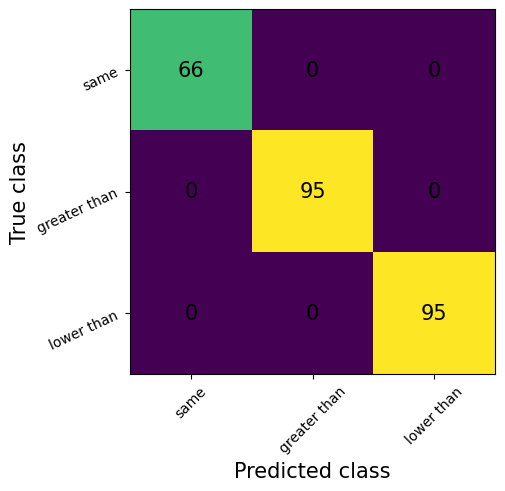

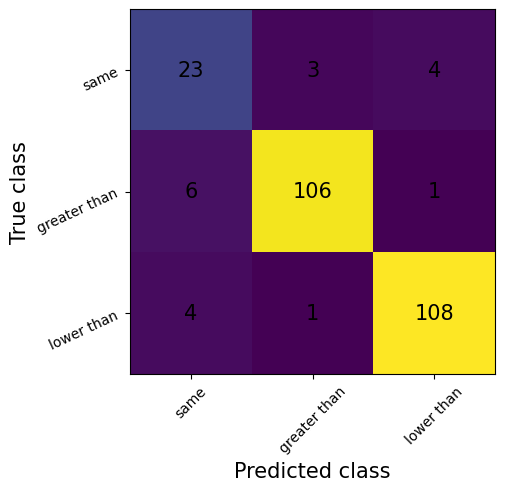

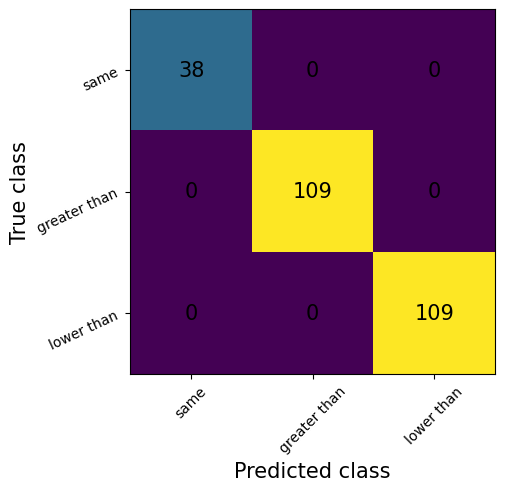

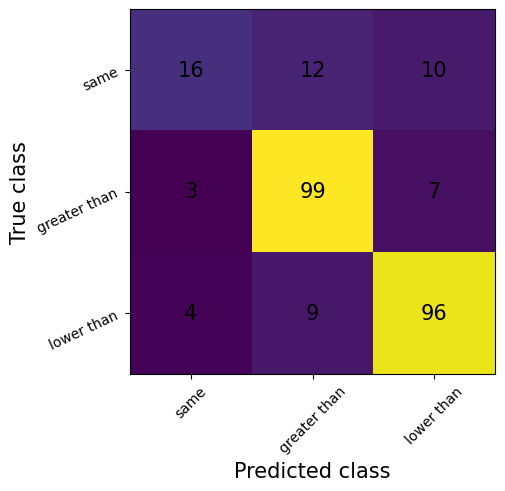

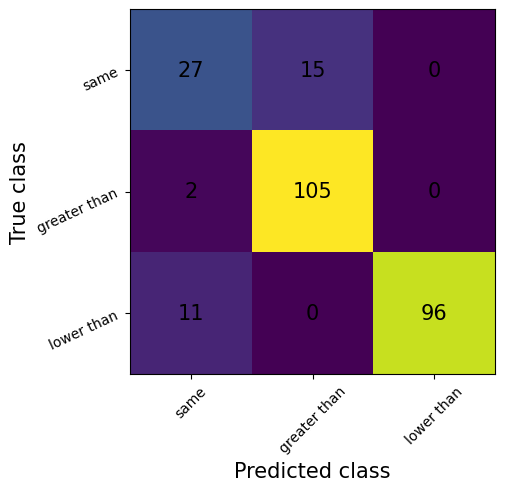

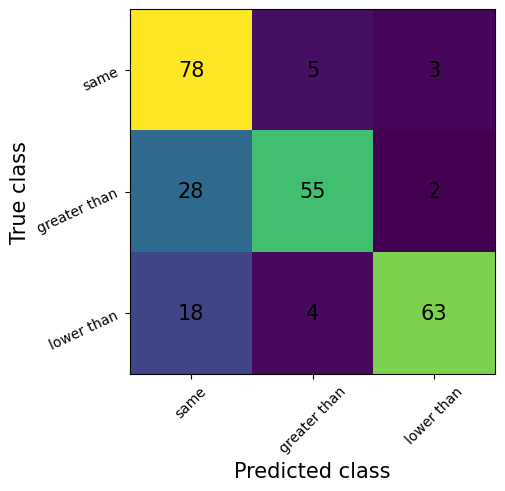

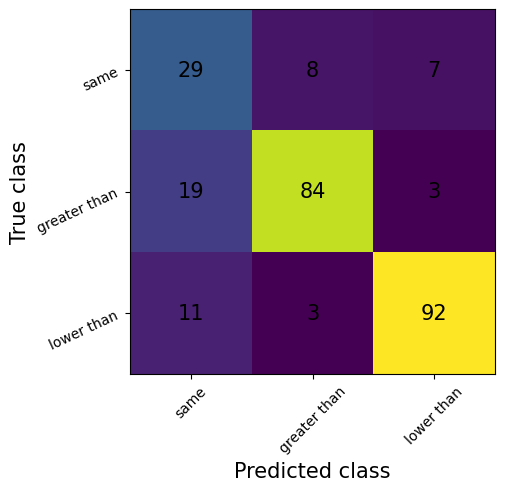

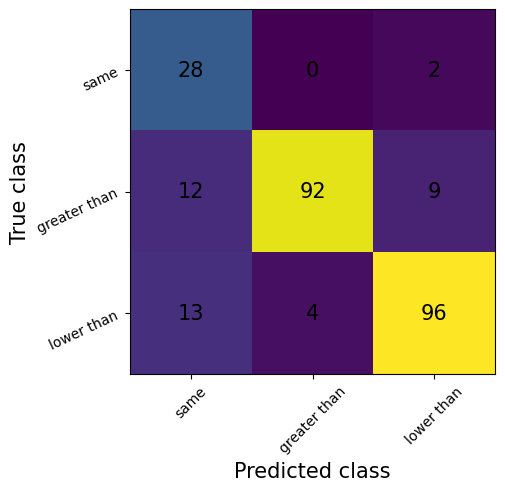

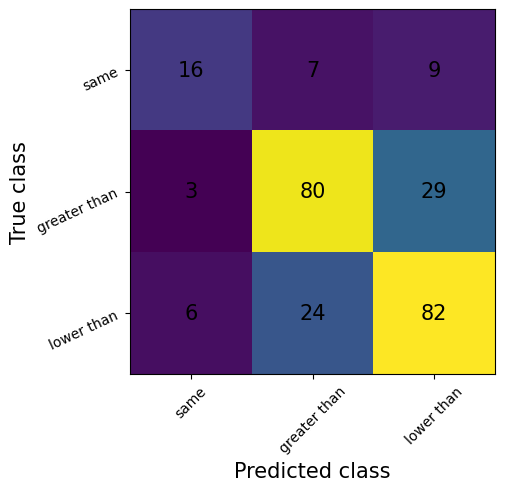

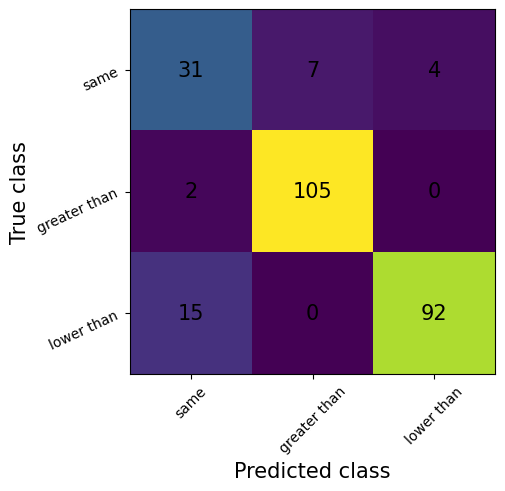

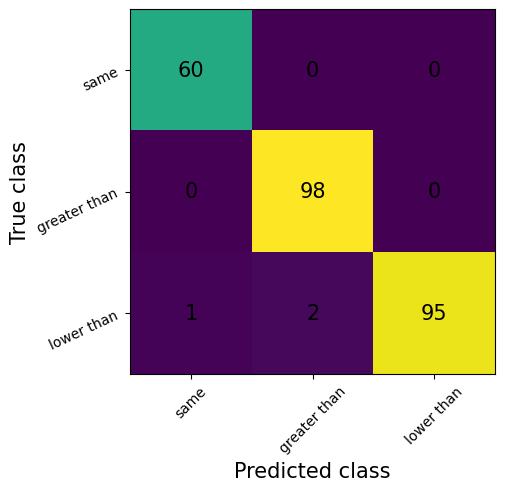

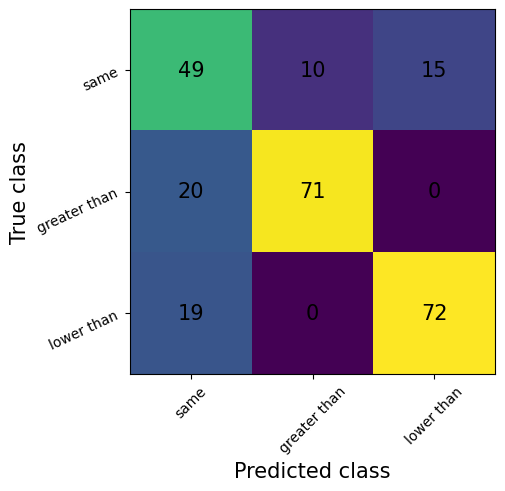

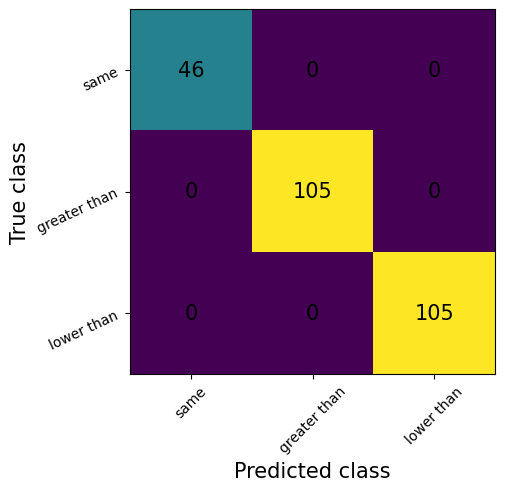

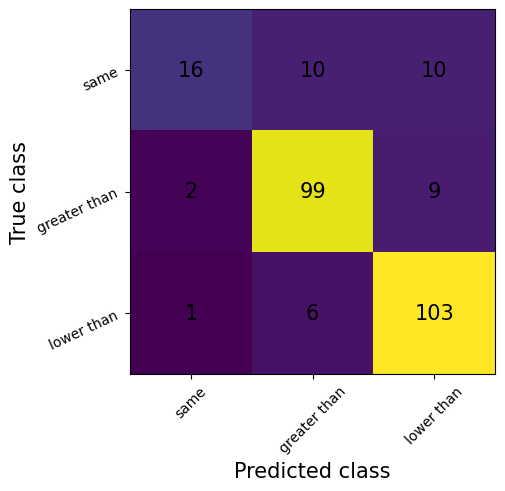

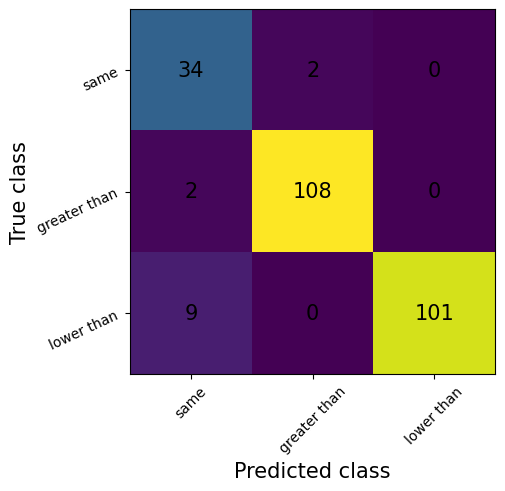

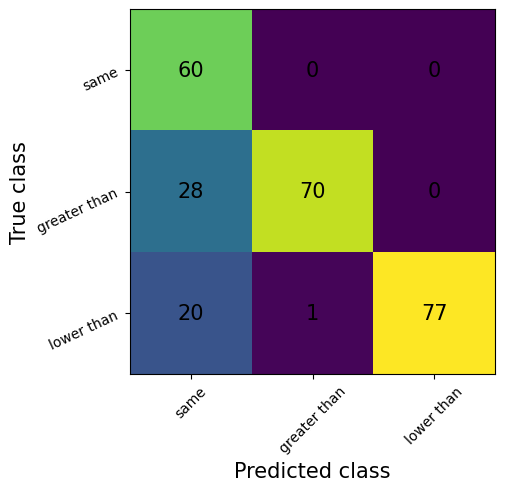

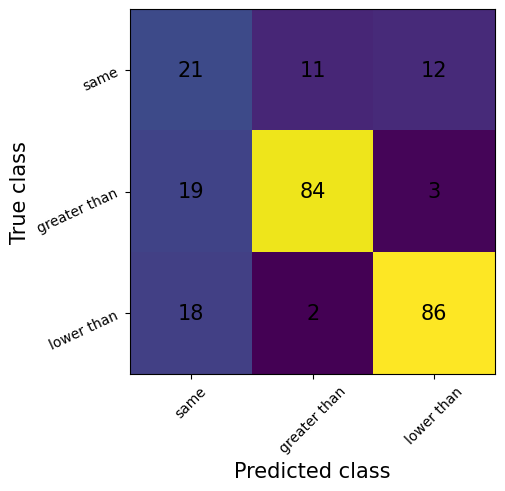

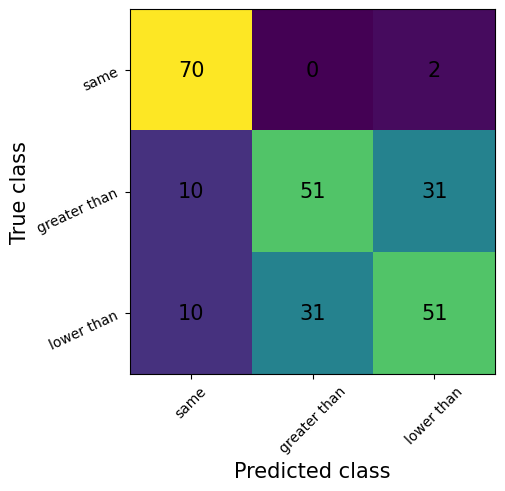

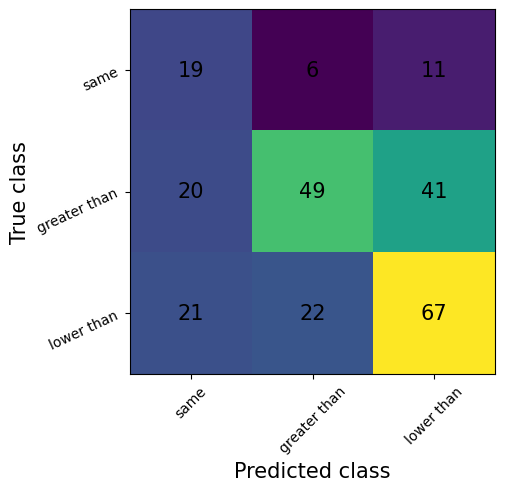

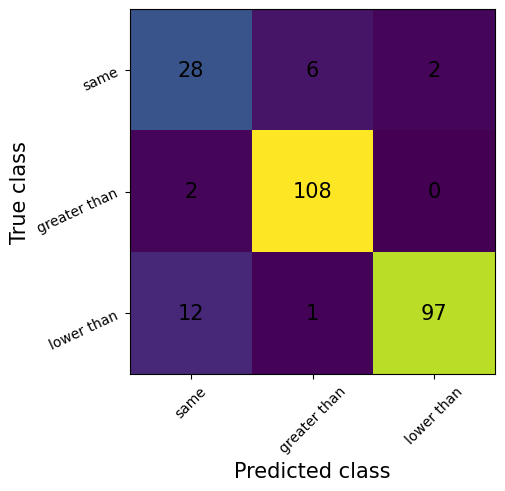

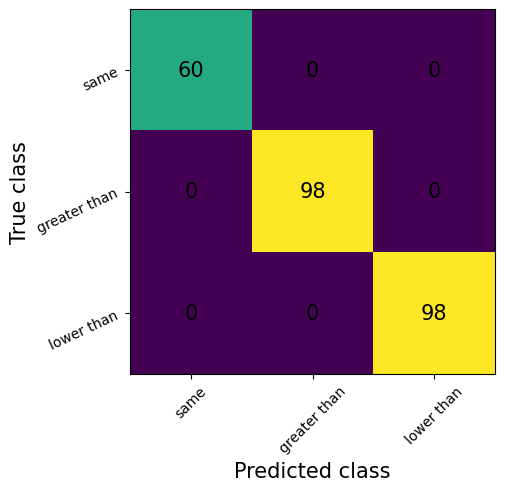

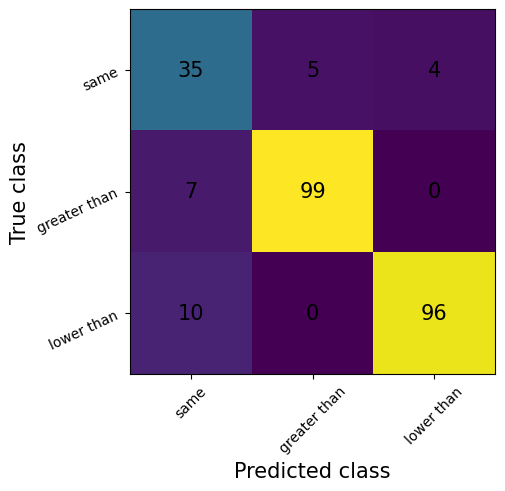

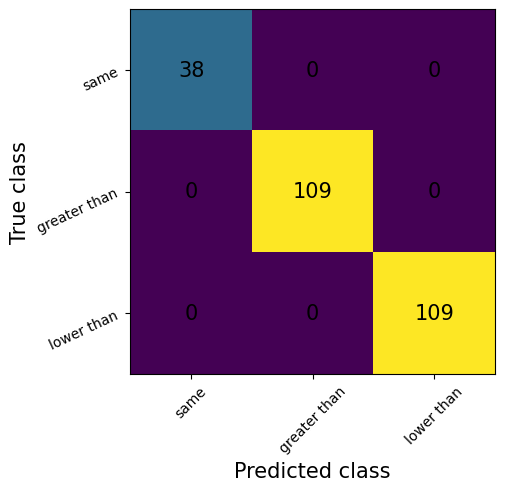

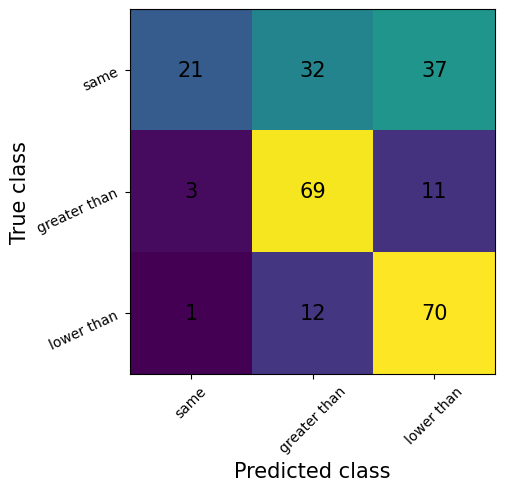

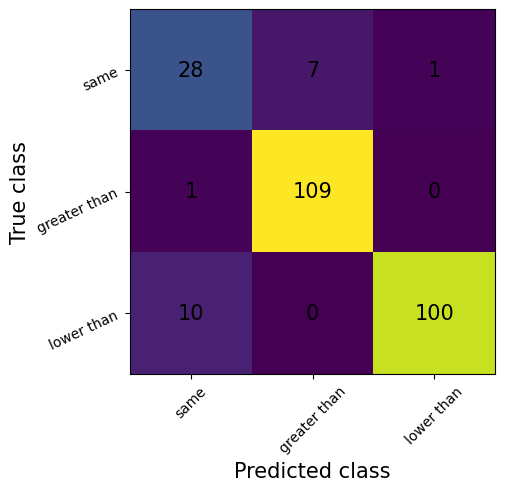

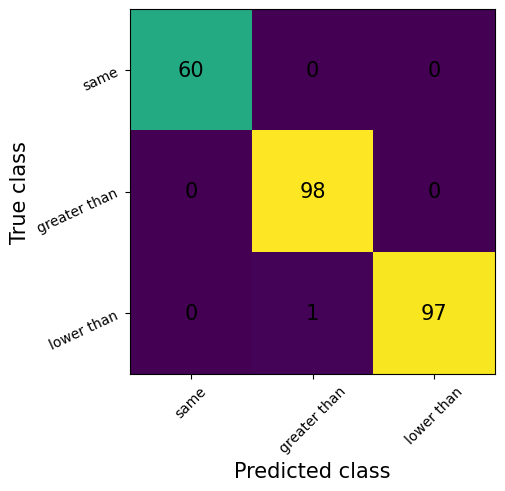

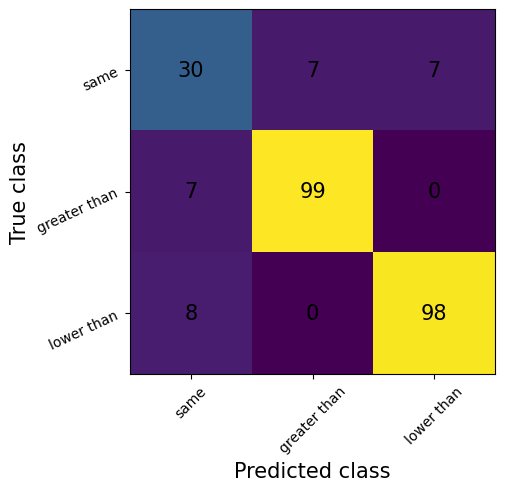

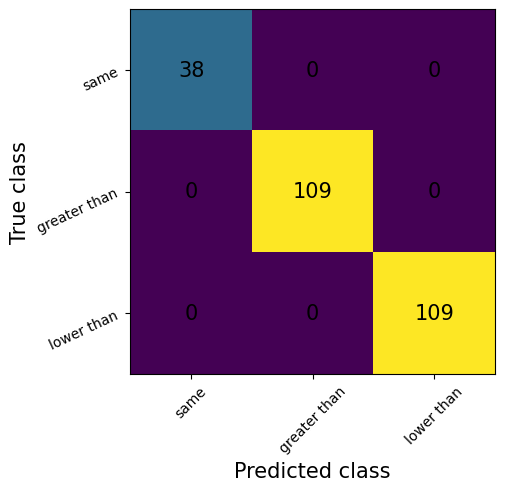

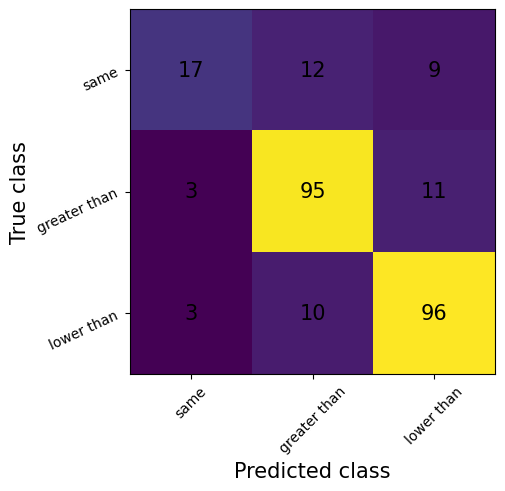

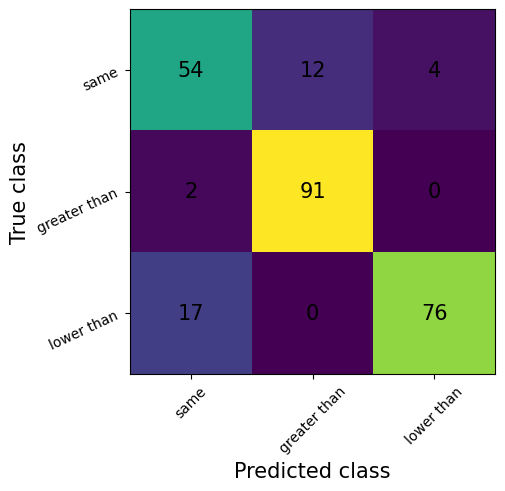

In [3]:

tester = L.Trainer(max_epochs=1,
                   accelerator="gpu",
                   devices=1)
tester.test(
    model,
    ckpt_path=ckpt_path,
    dataloaders=[dls[split] for split in splits]
)

if not args.test:
    torch.save(tester.callback_metrics, f"results_{exp_id}.pth")

5 6


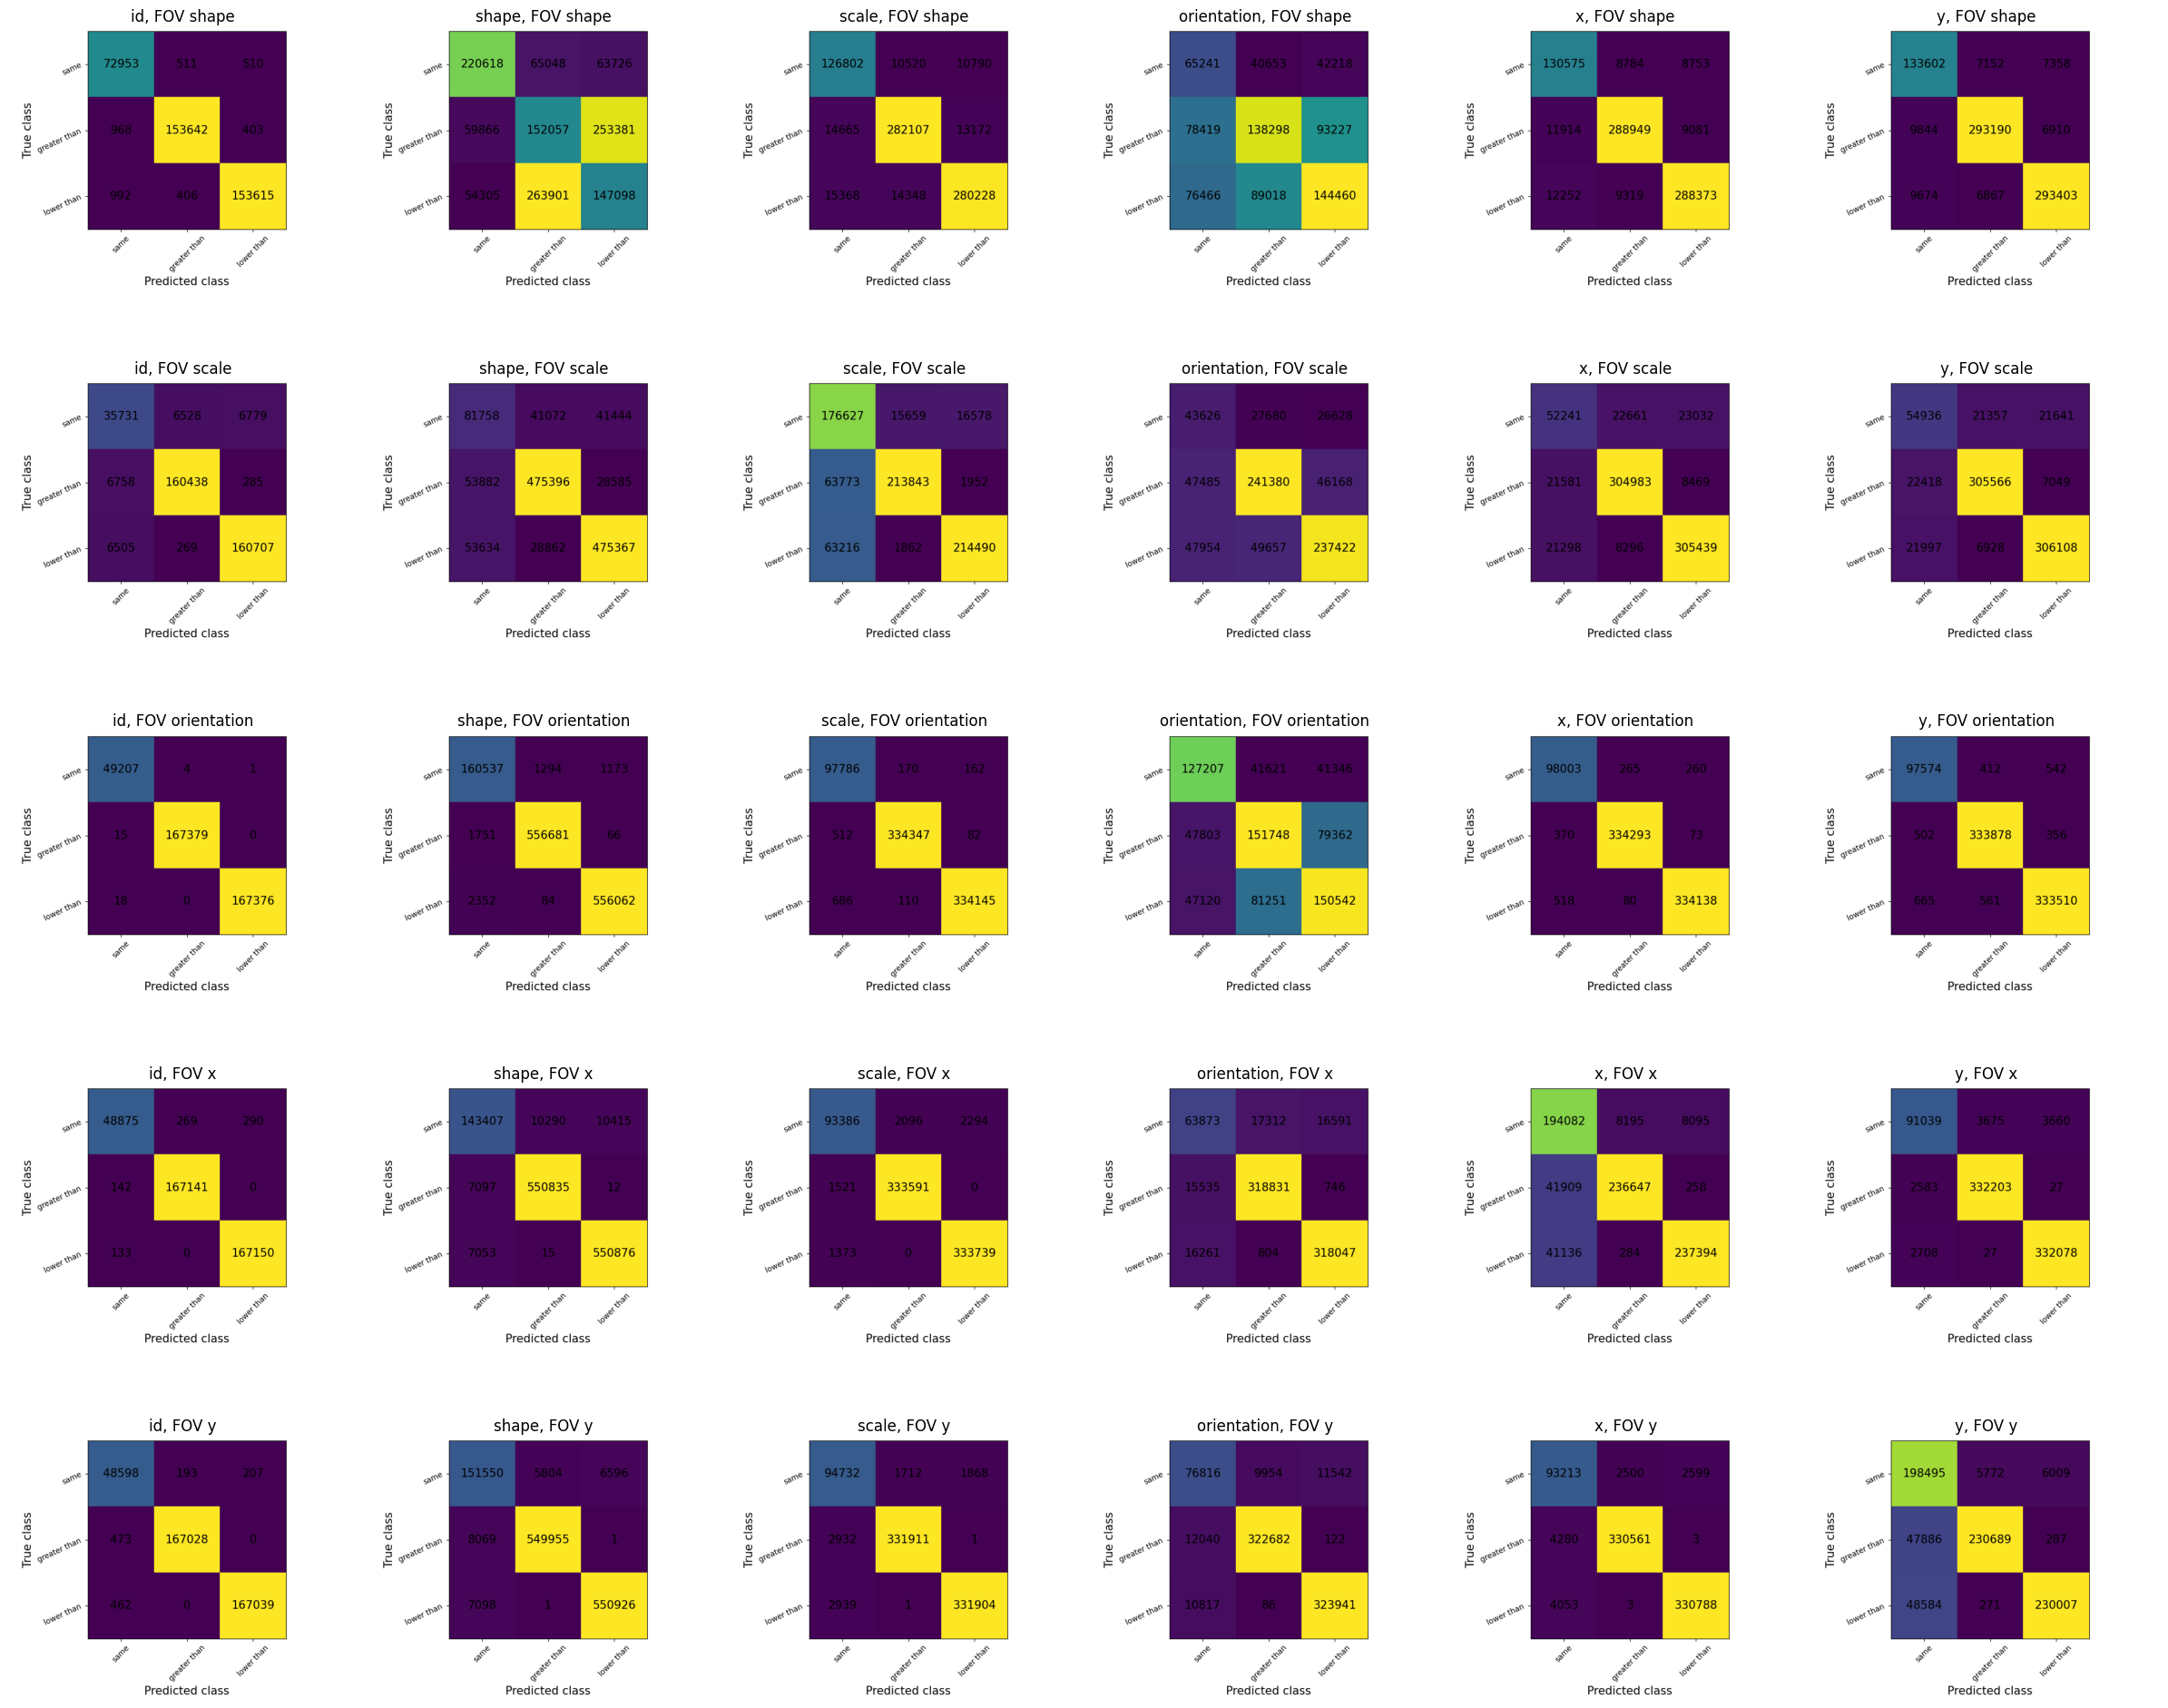

5 6


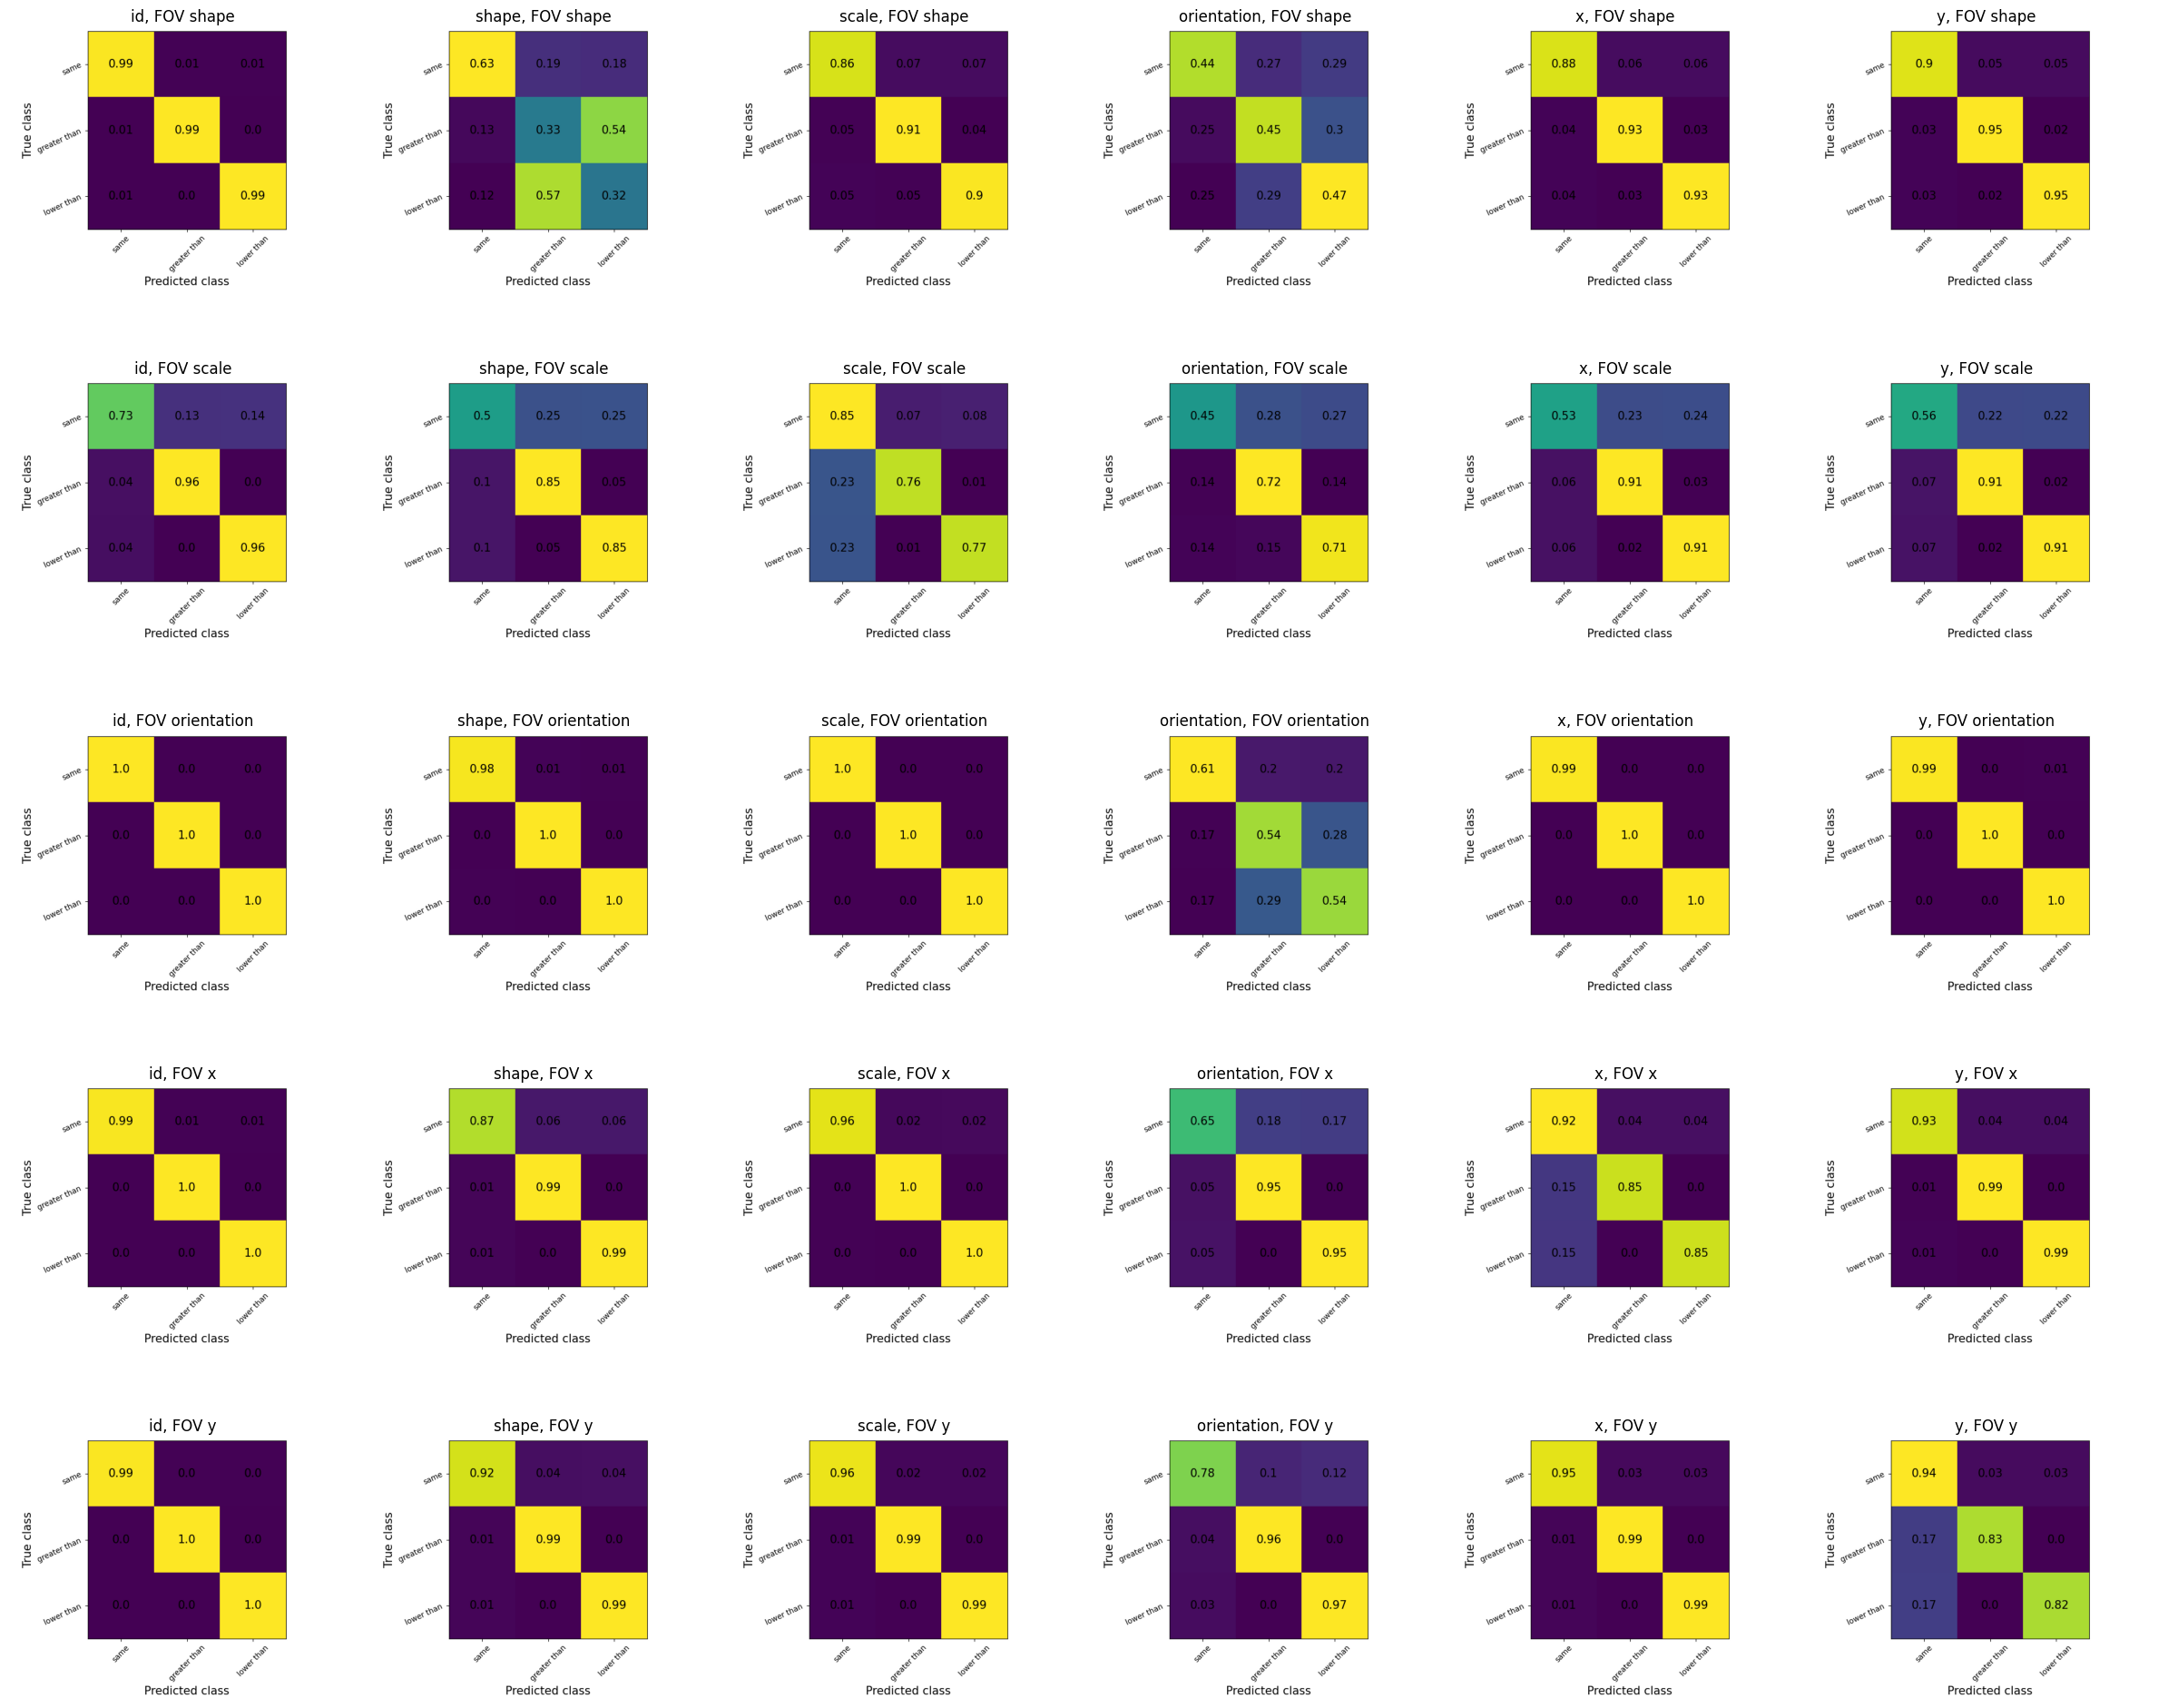

5 6


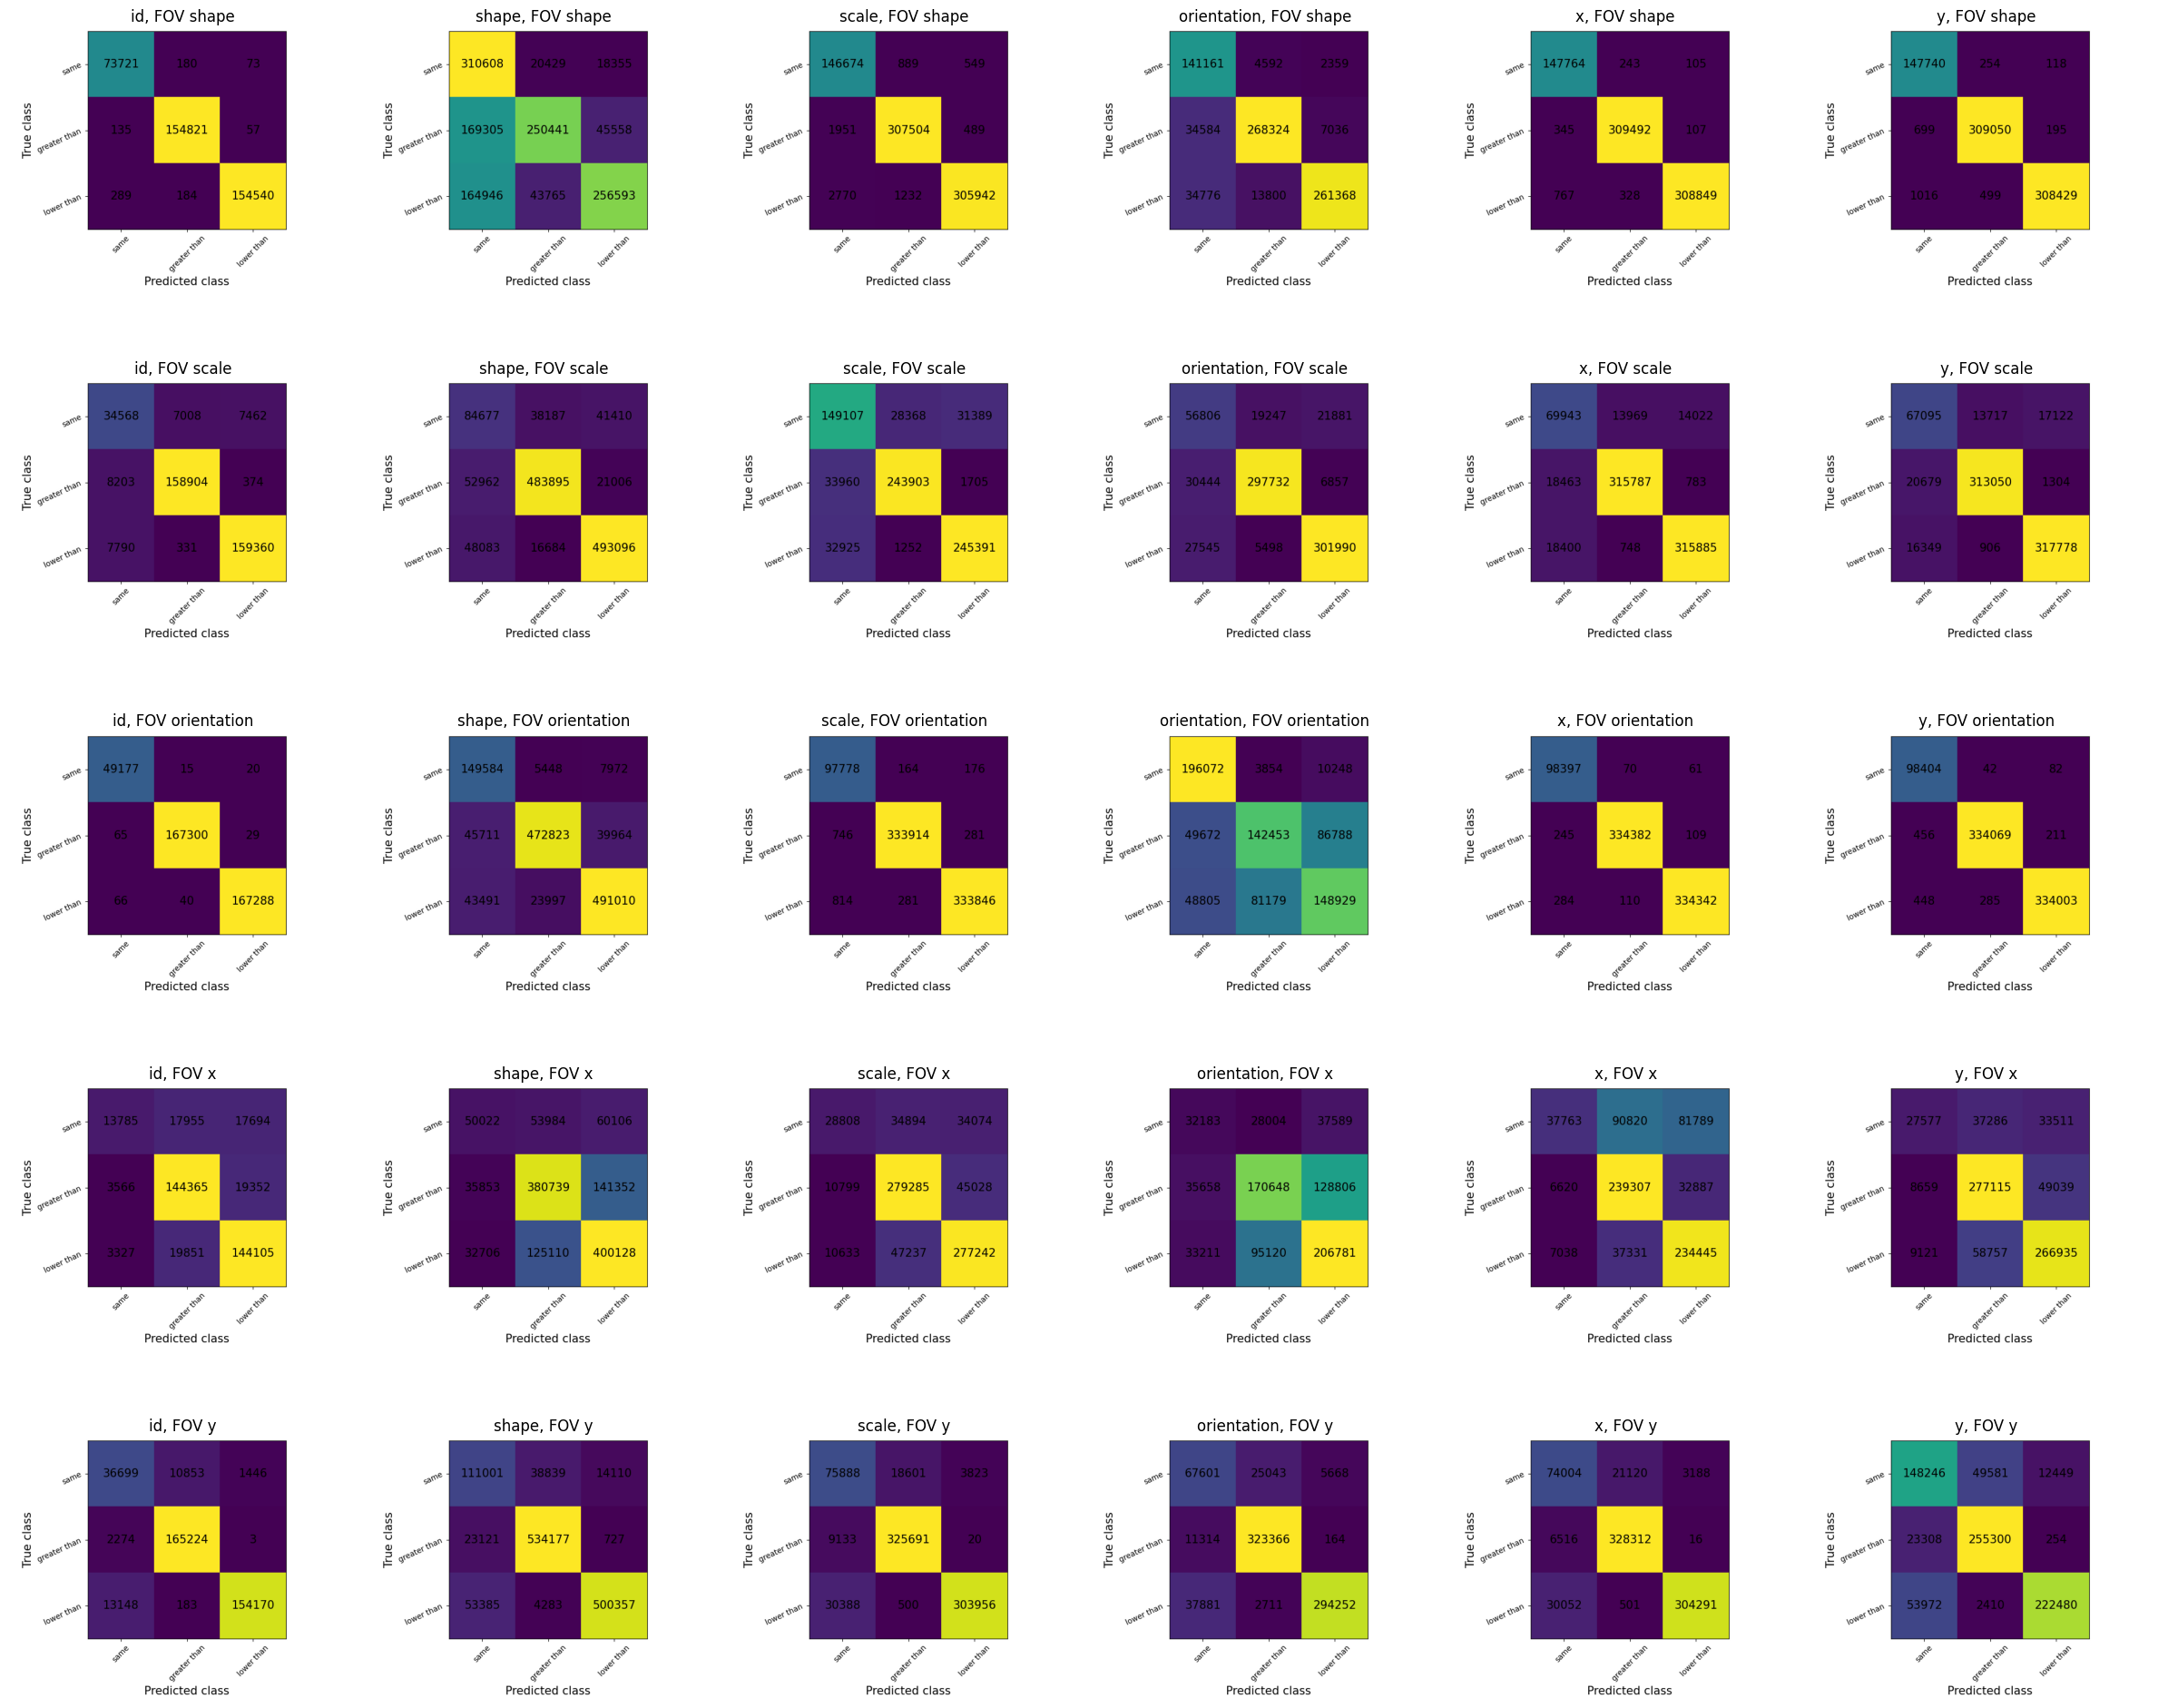

5 6


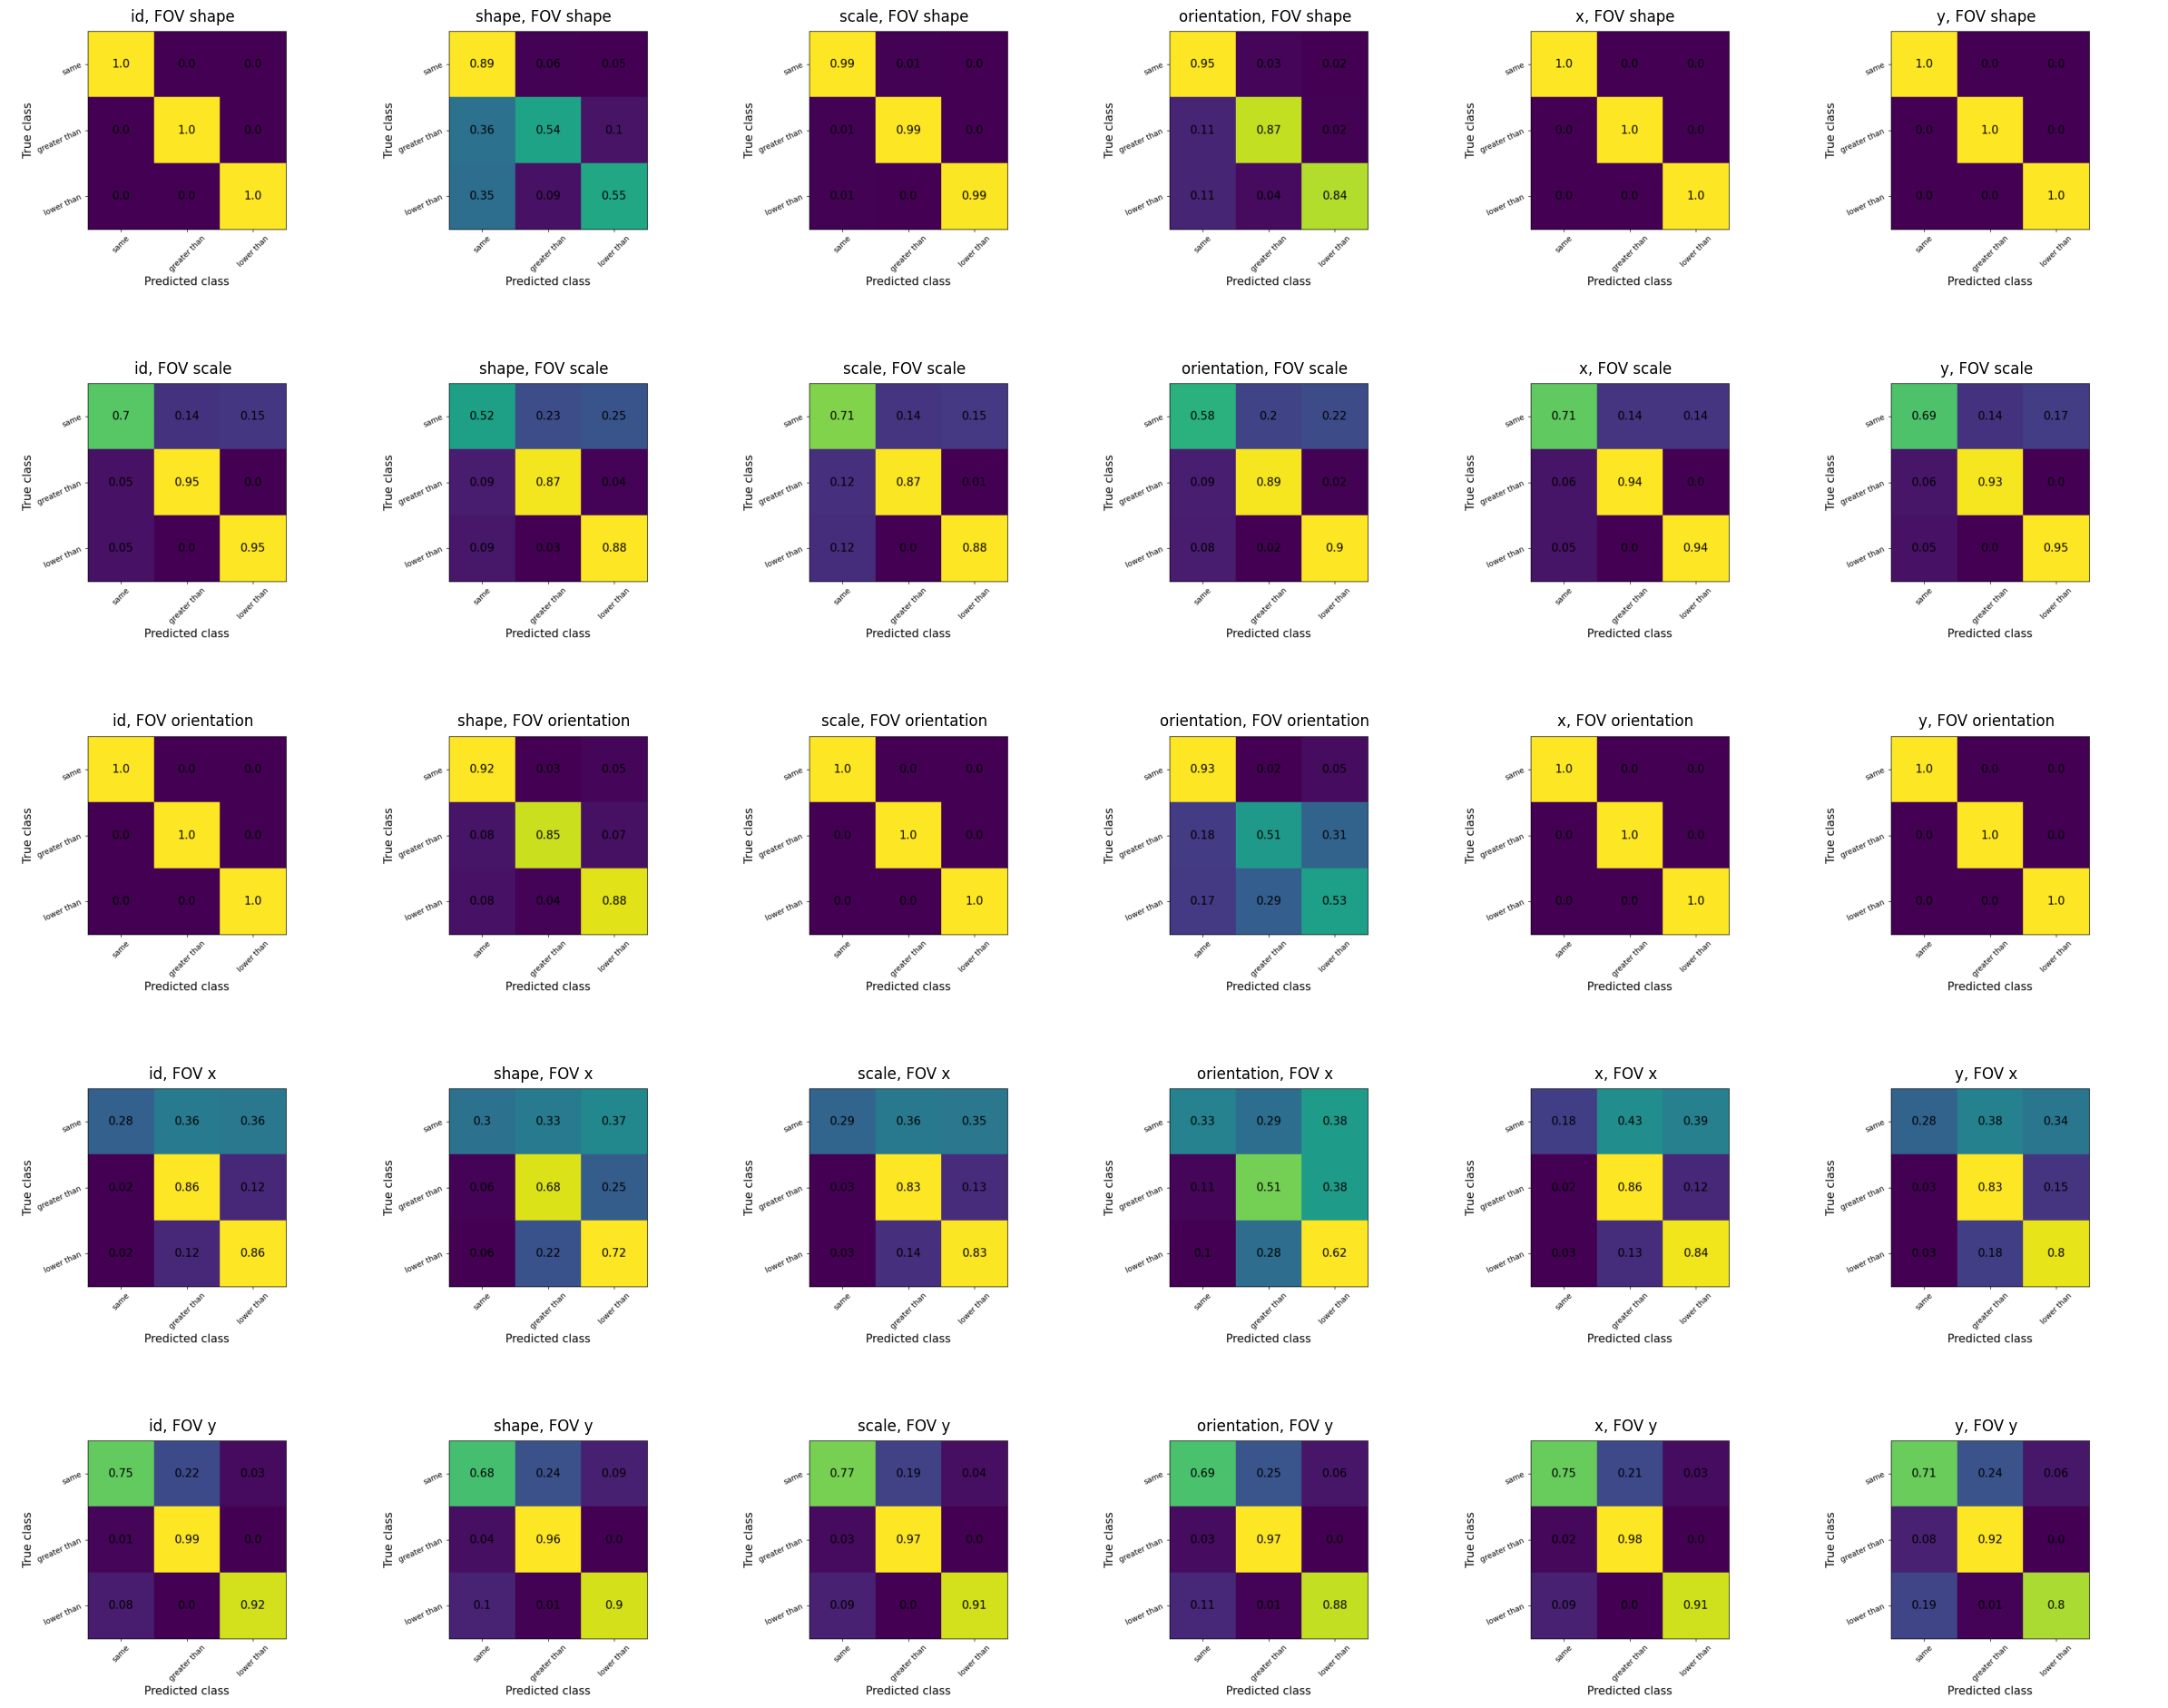

5 6


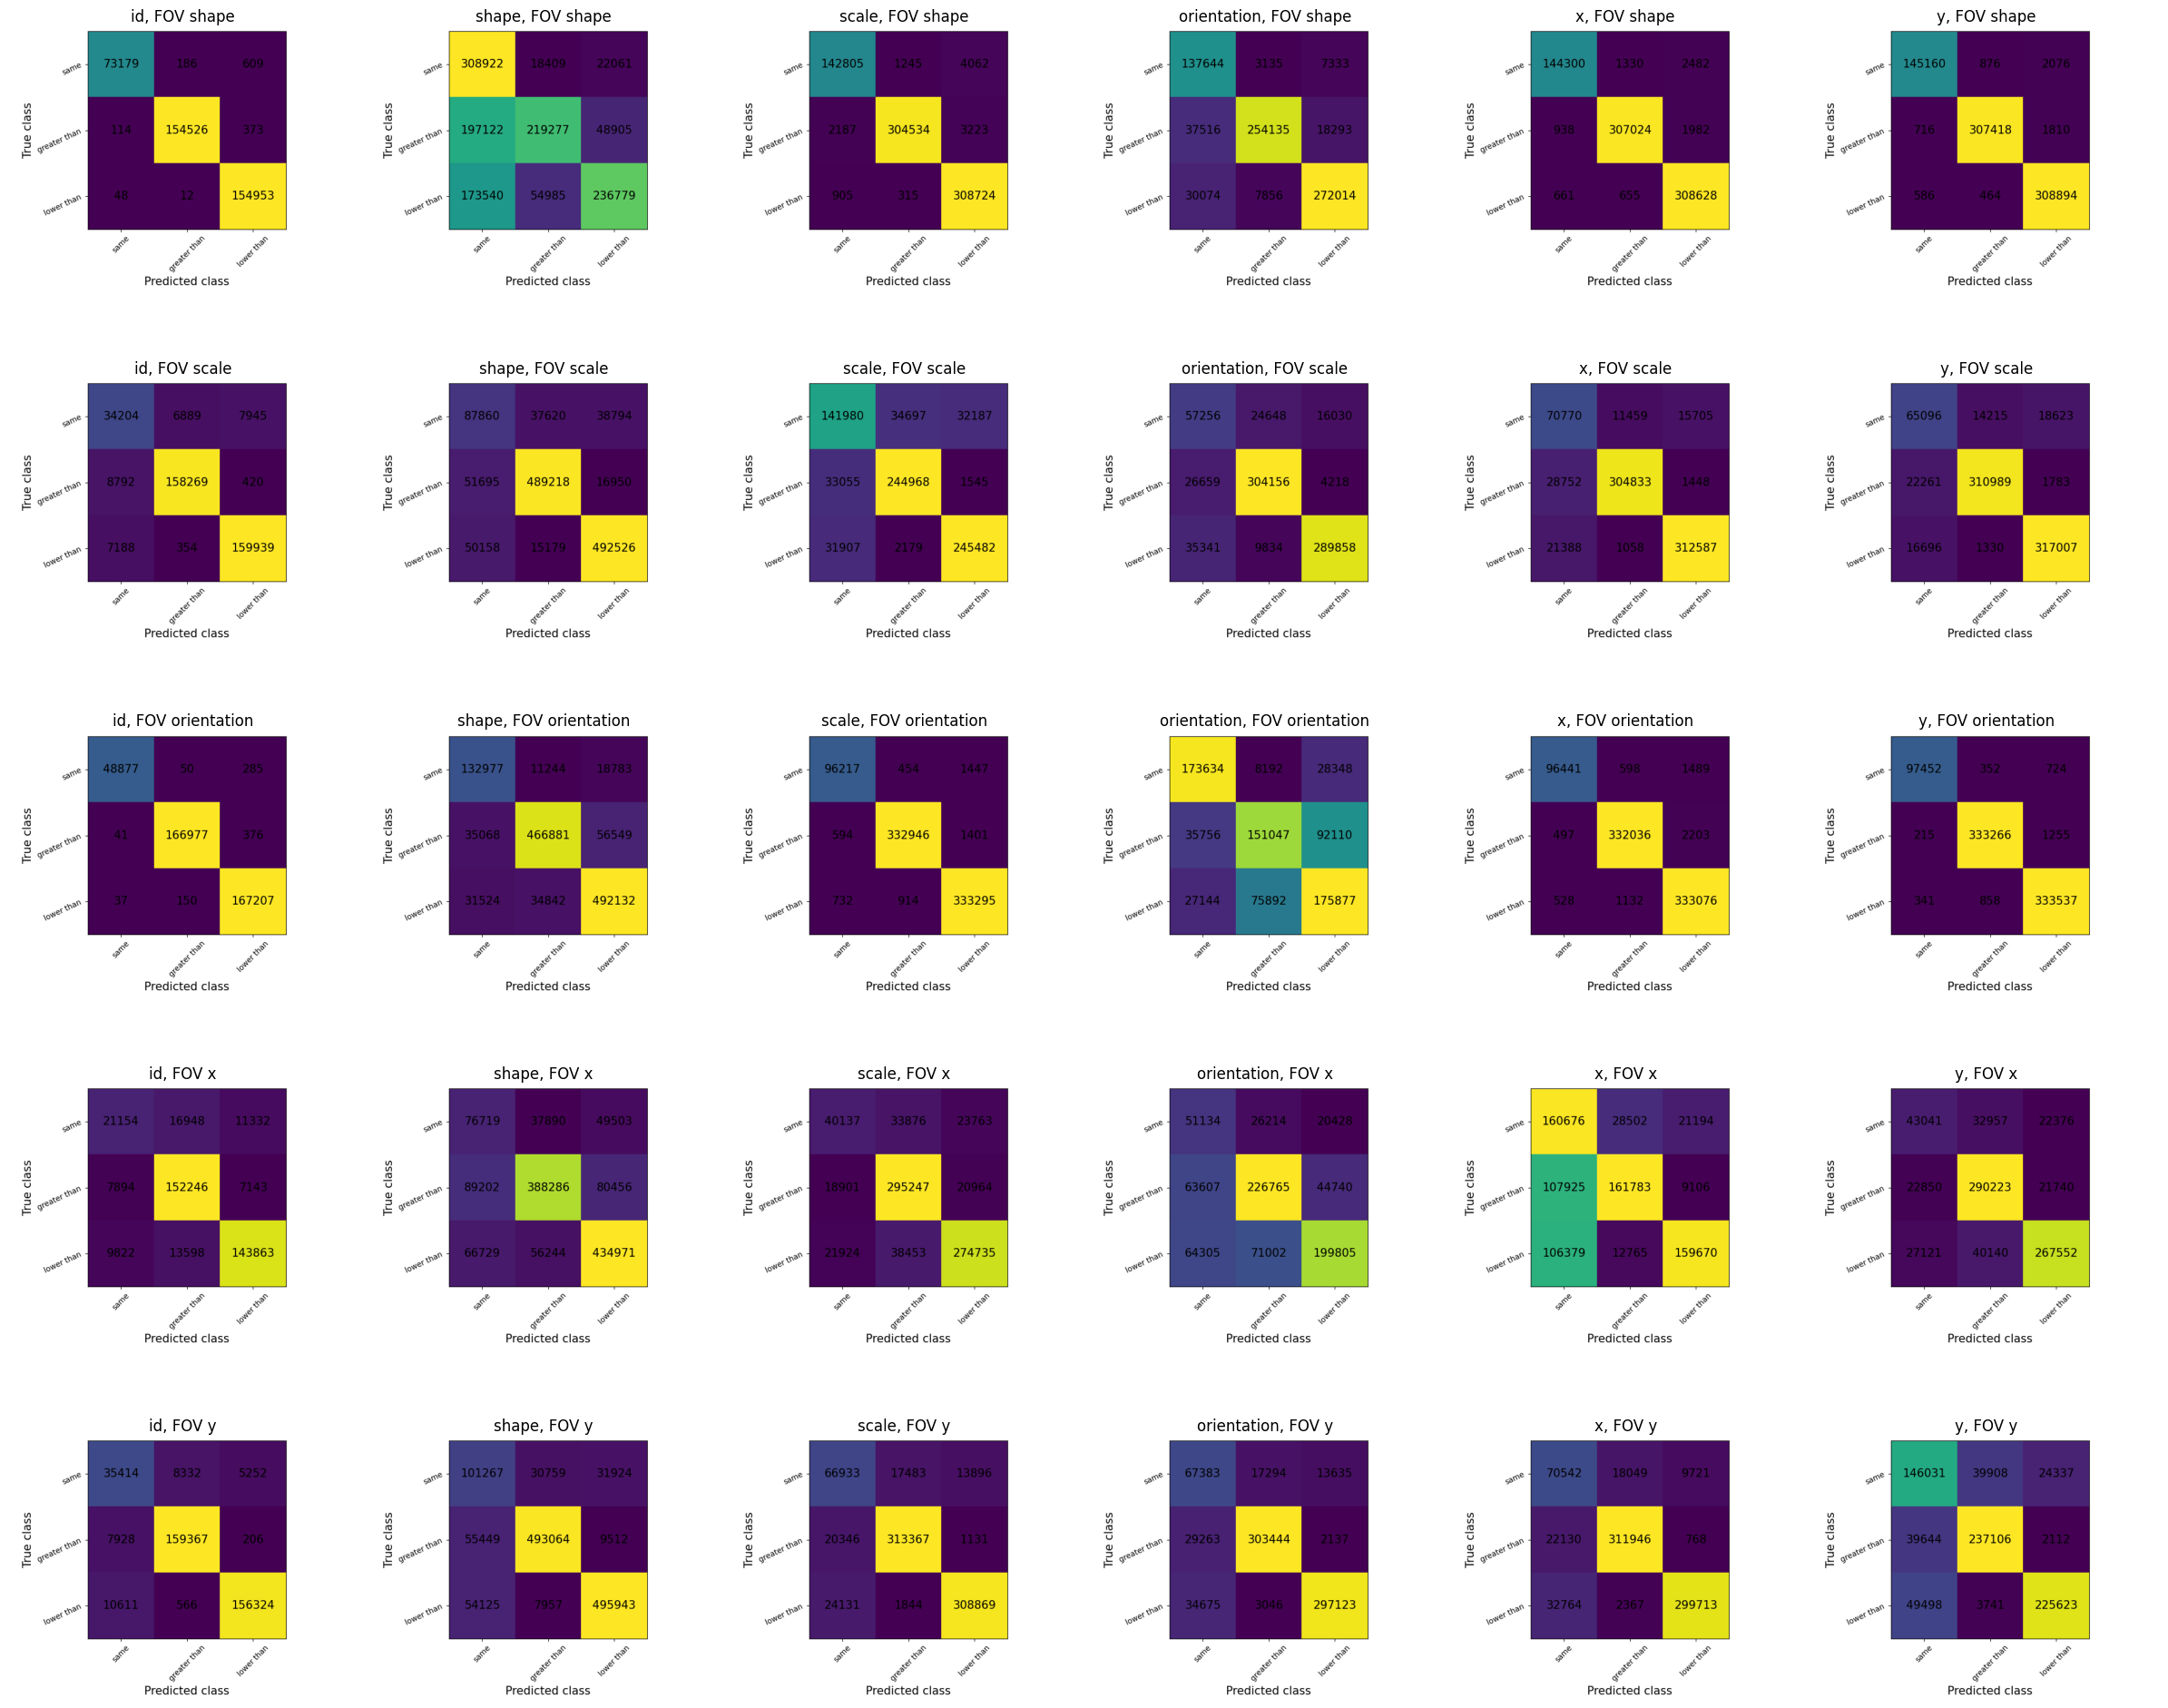

5 6


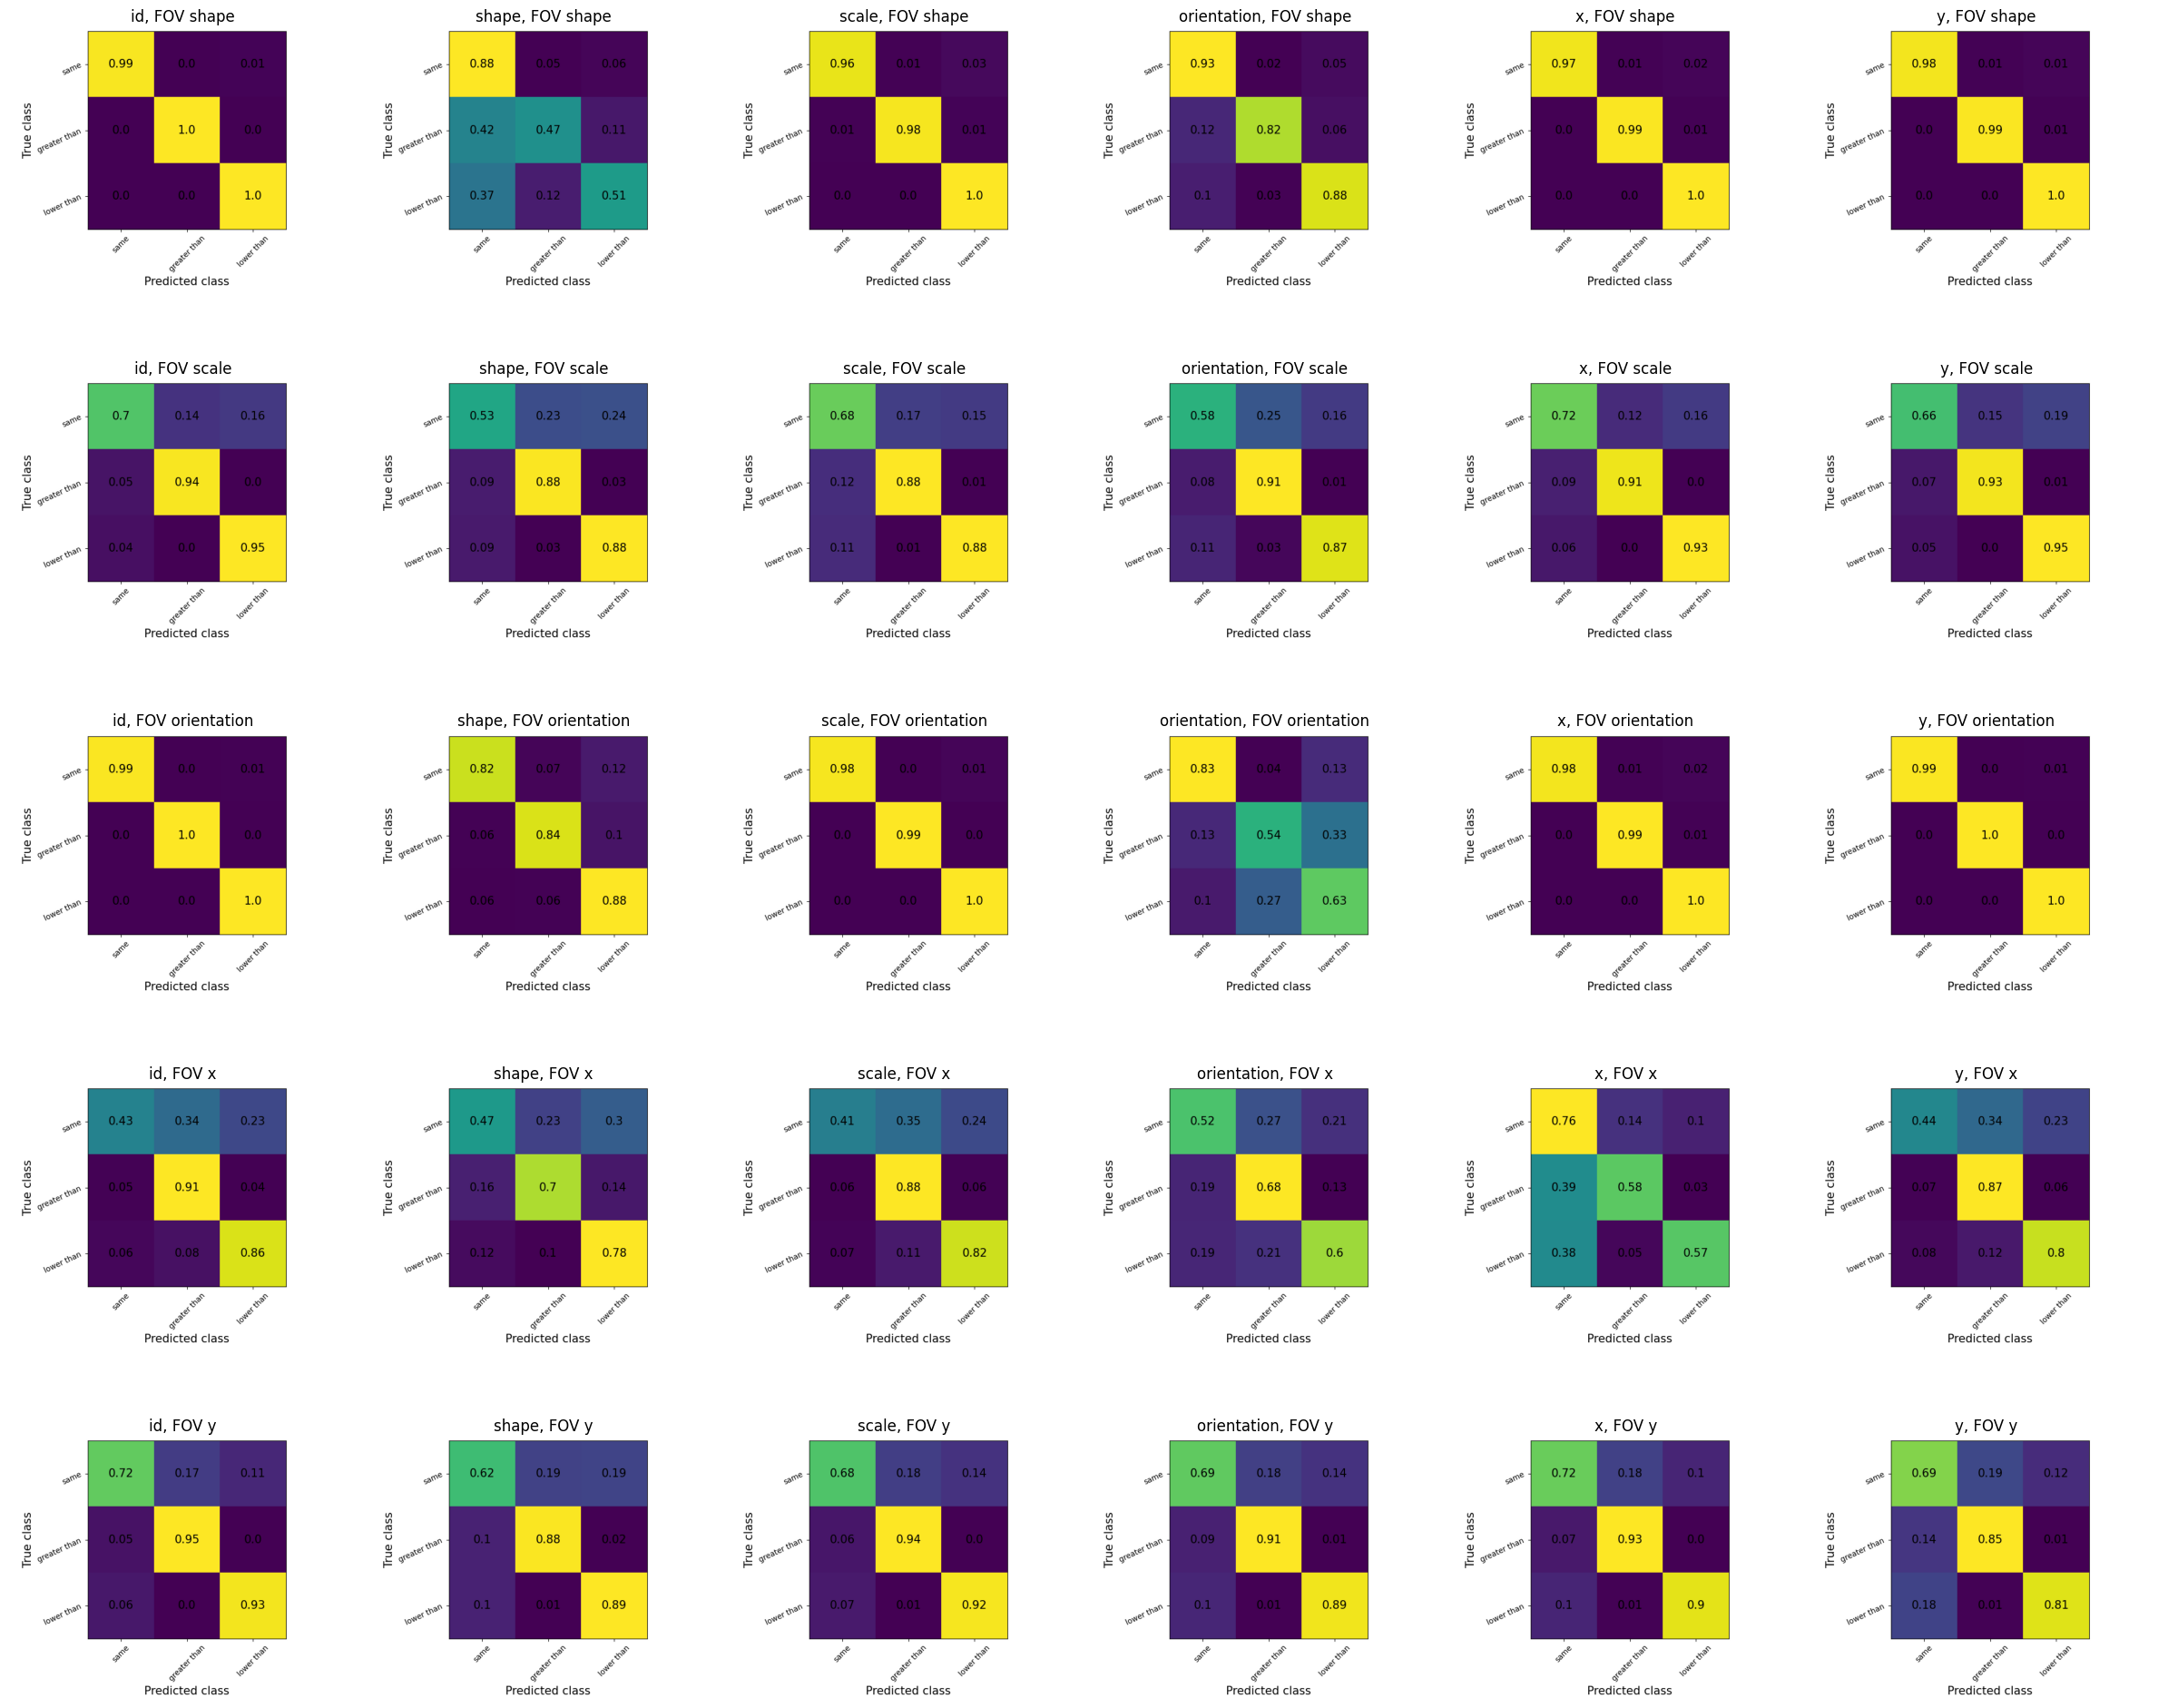

5 6


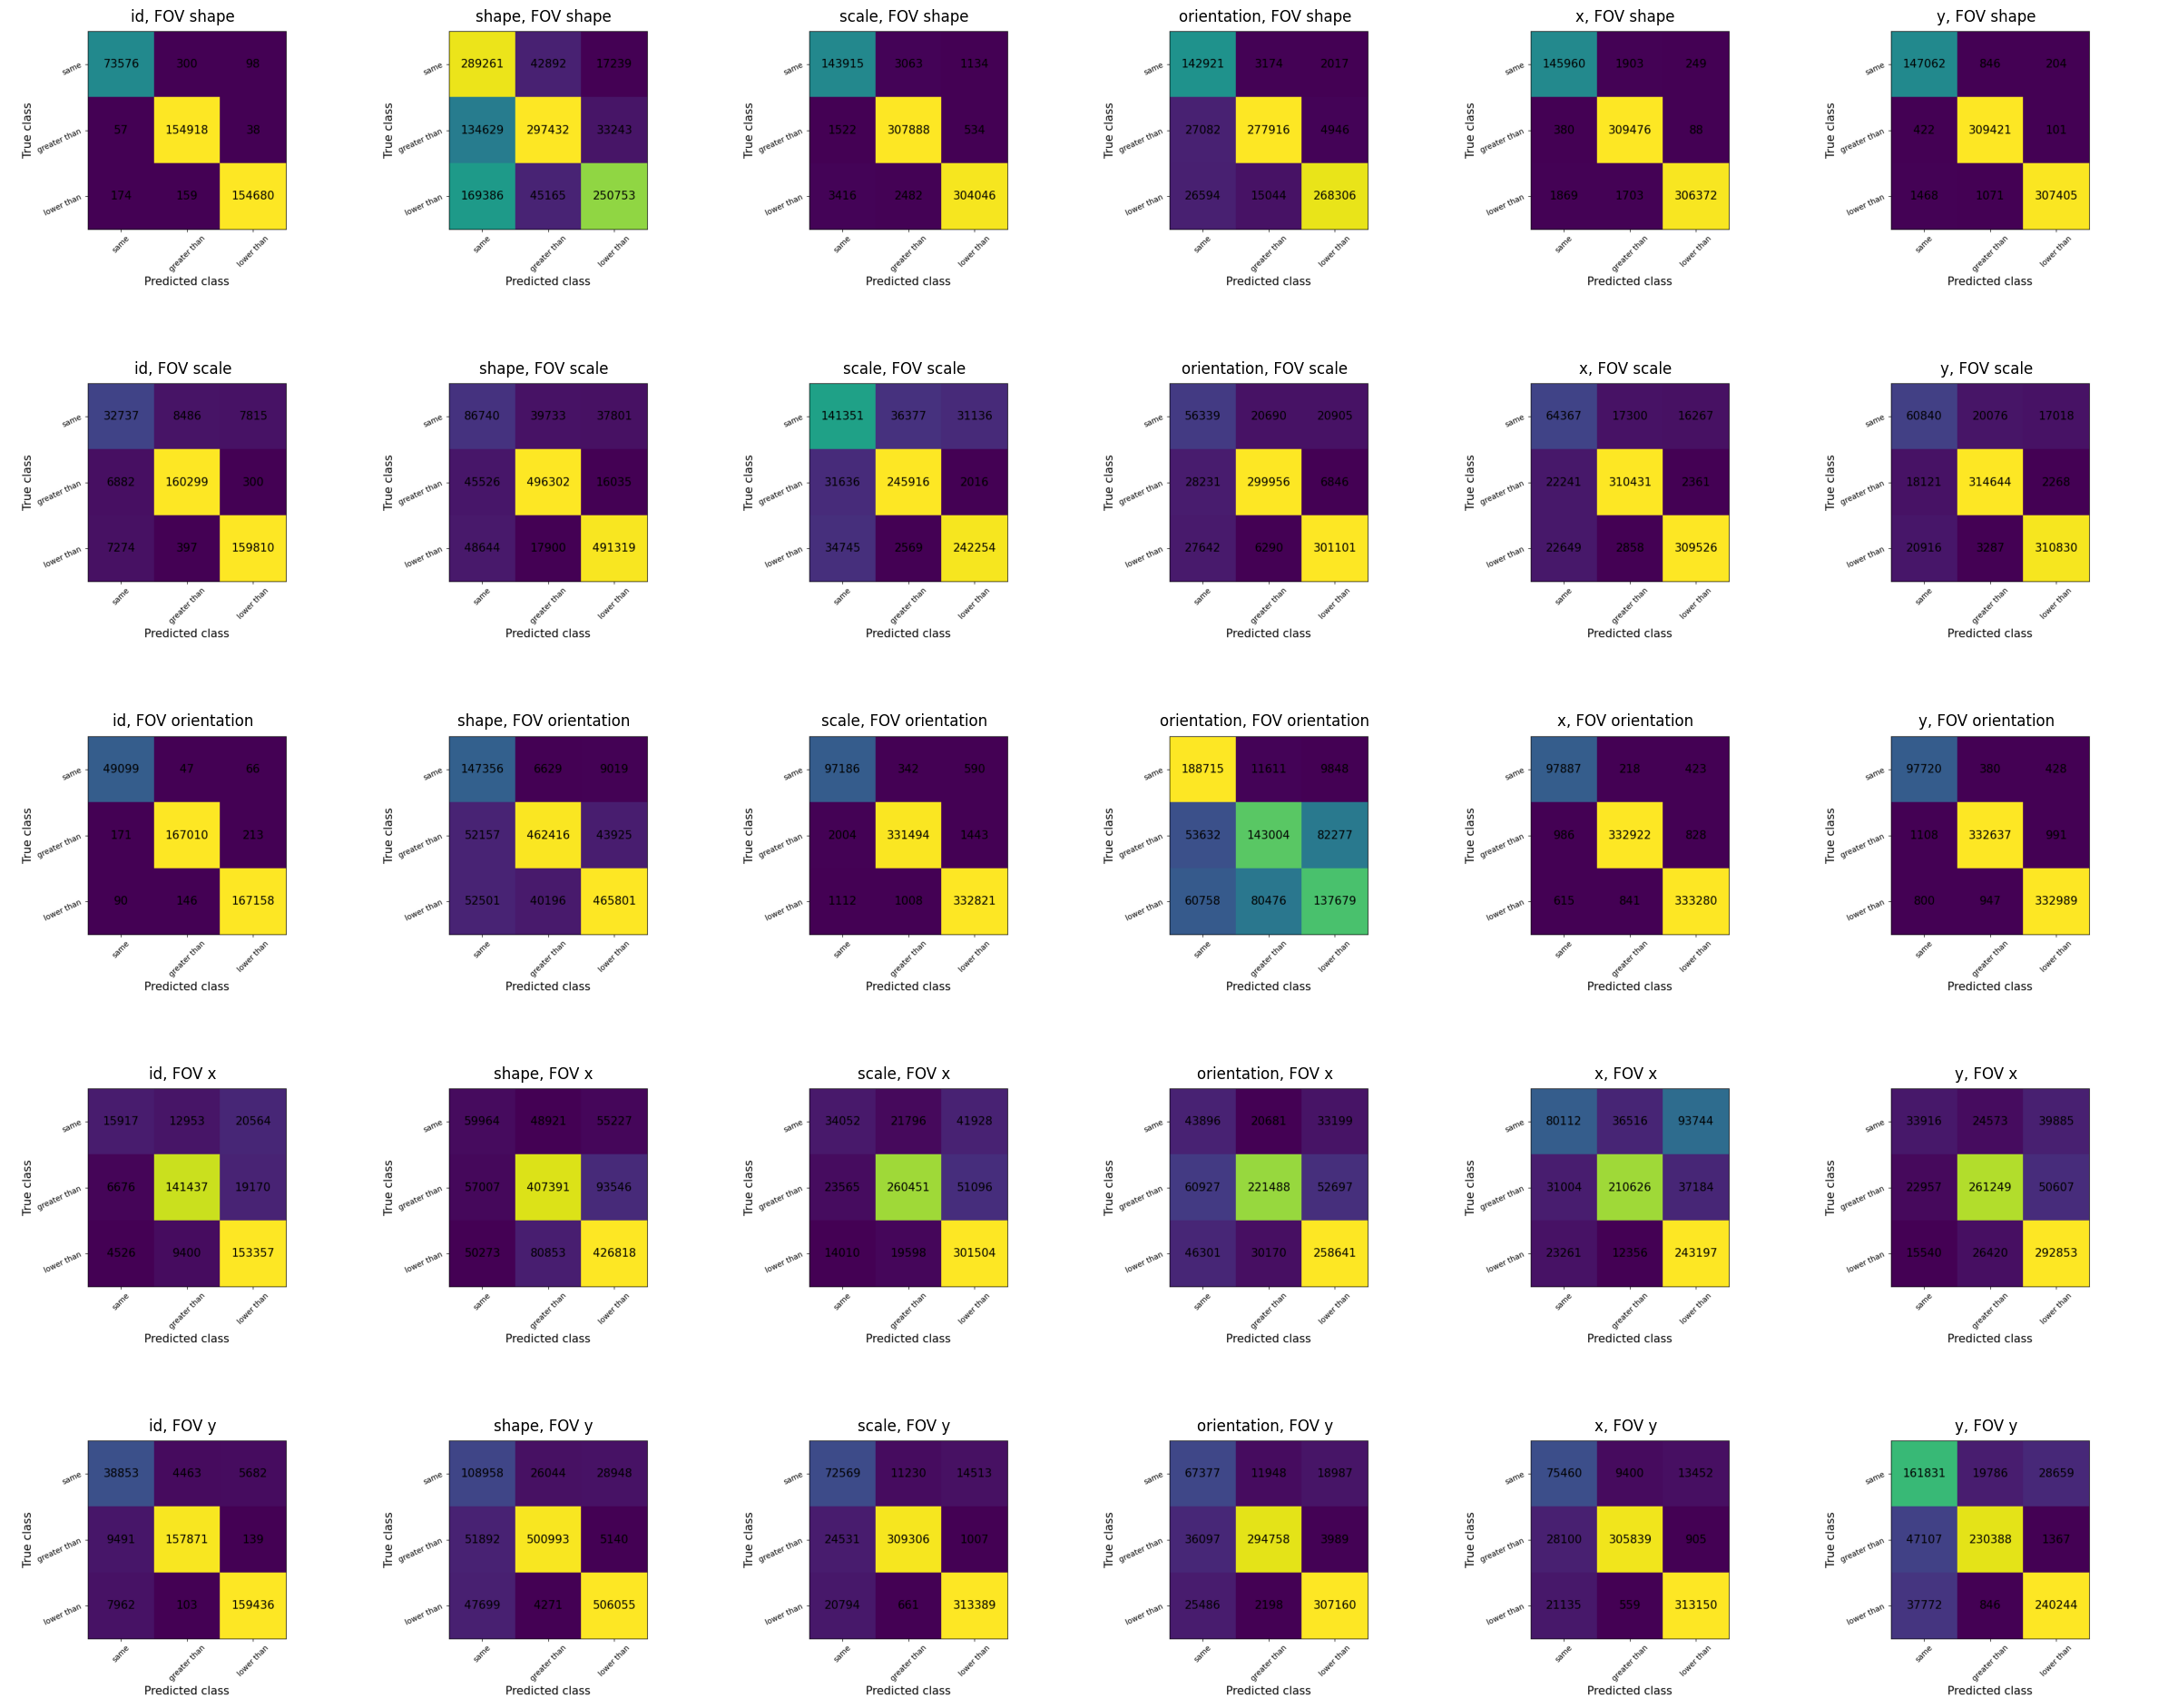

5 6


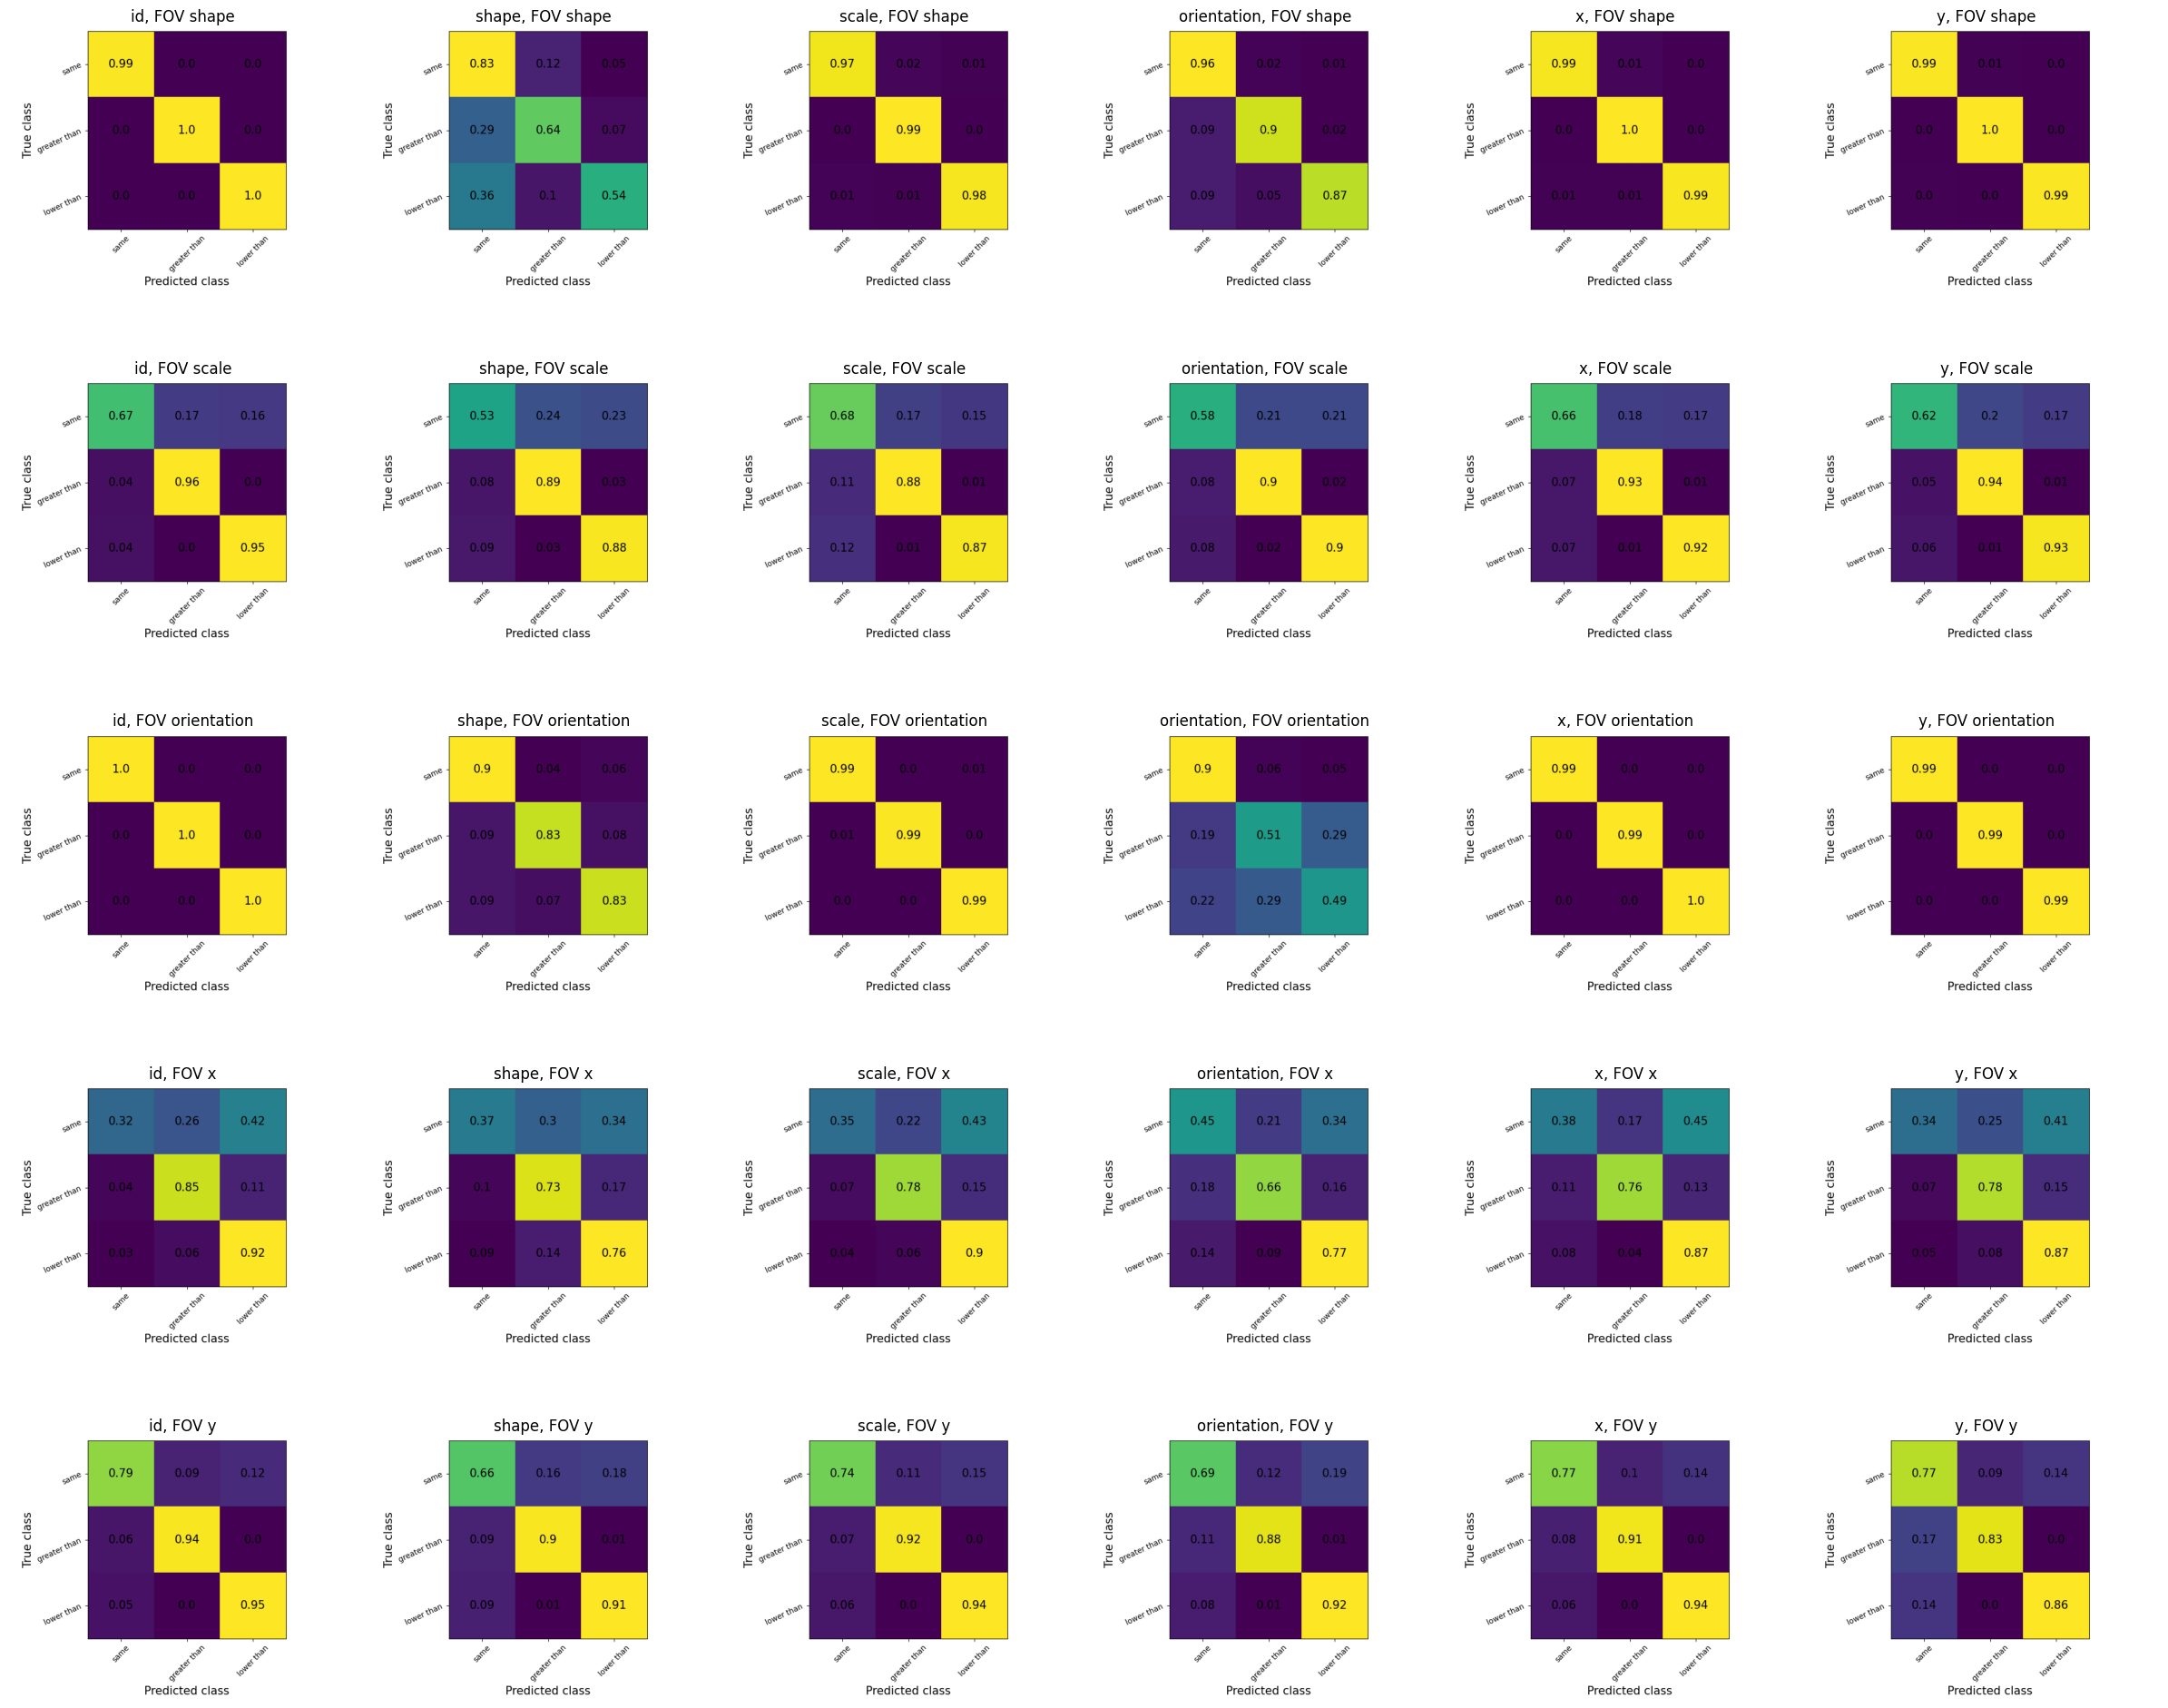

5 6


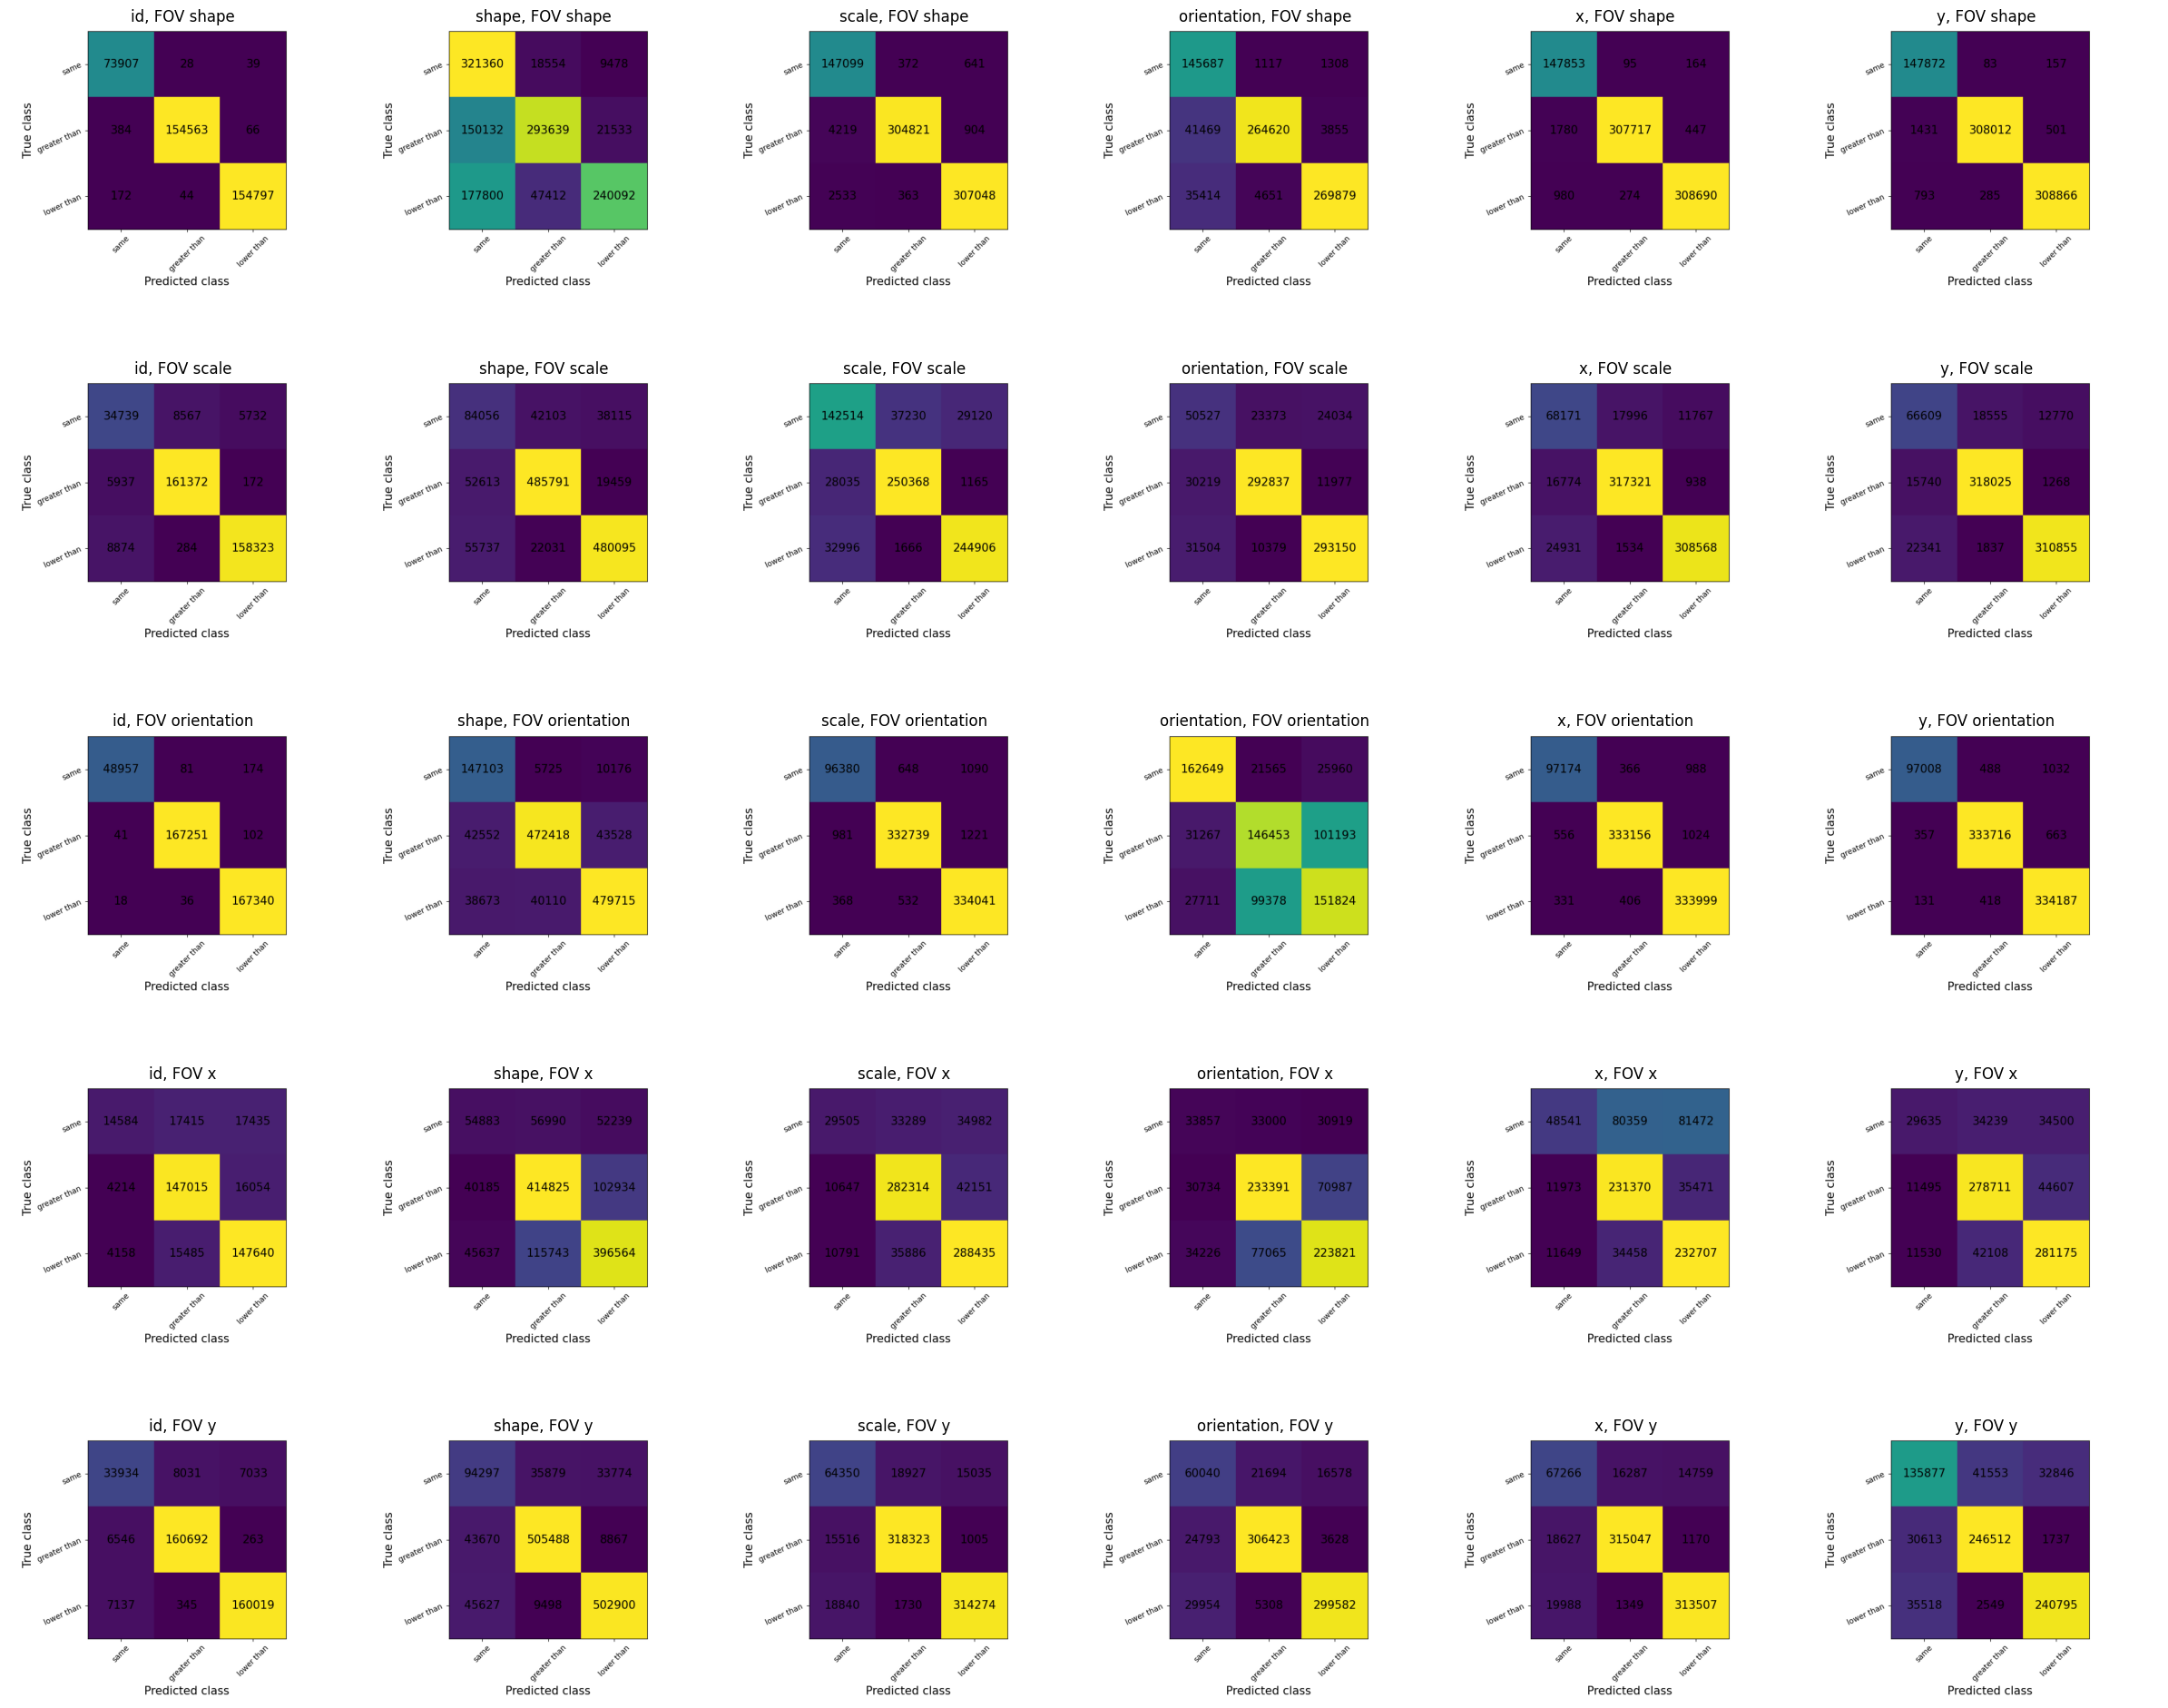

5 6


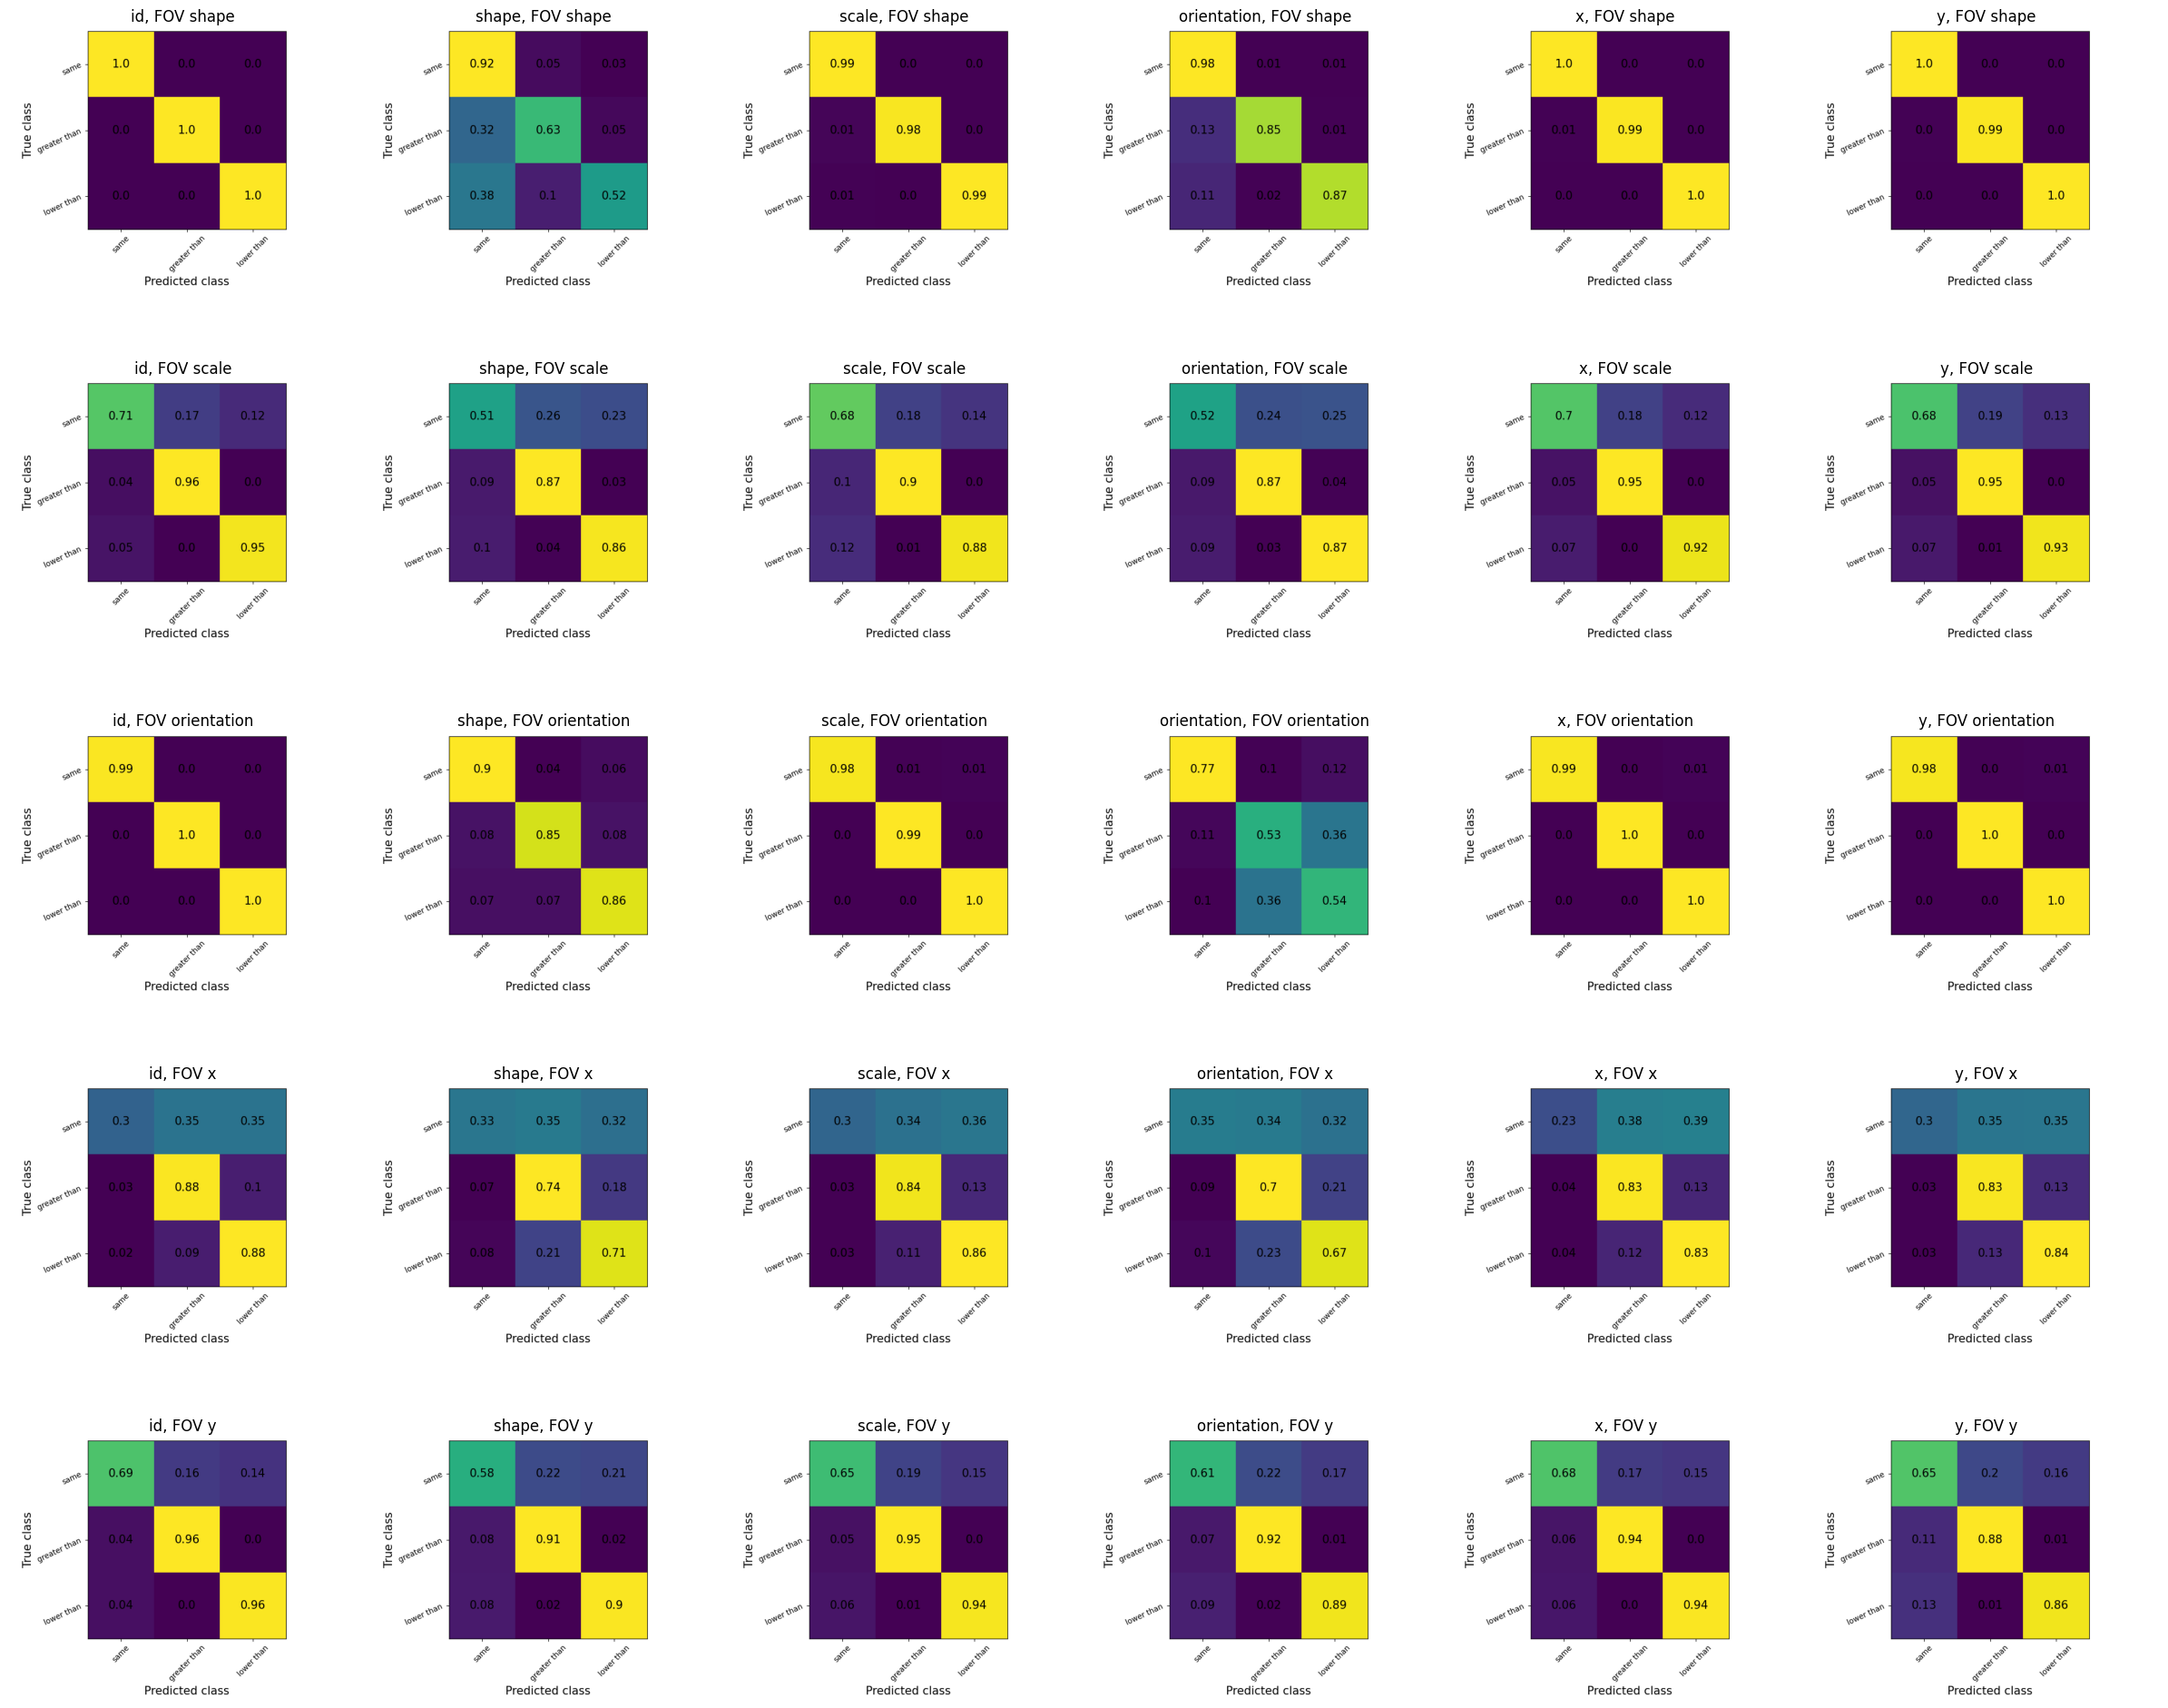

In [32]:
import torch
import pandas as pd
from  IPython.display import display
exp_id = "t497198p"
# untrained
# vit_l_16
#  vit_l_32 
#  vit_b_32 
#  vit_b_16
for exp_id in ["3obmll1b","t497198p" ,"xf9945ri", "jff62ktj", "yi49kbtk"]:

    metrics  = torch.load(f"results_{exp_id}.pth")
    metrics = {k:v.item() for k, v in metrics.items() if "acc" in k}
    # Reshape the dictionary into a DataFrame
    reshaped_data = []
    
    for key, value in metrics.items():
        prefix, suffix = key.split('_', 1)  # Split by the first underscore
        reshaped_data.append({'Split': prefix, 'Metric': suffix, 'Value': value})
    
    # Create a DataFrame from reshaped data
    df = pd.DataFrame(reshaped_data)
    
    
    # Pivot to reshape the table
    table = df.pivot(index='Split', columns='Metric', values='Value')
    
    # Reorder the columns as desired
    columns_order = ['shape_acc', 'scale_acc', 'orientation_acc', 'x_acc', 'y_acc']
    table = table[columns_order]
    
    # Reorder the columns as desired
    columns_order = ['shape_acc', 'scale_acc', 'orientation_acc', 'x_acc', 'y_acc']
    table = table[columns_order]
    # Desired row order
    row_order = ["id", "shape", "scale", "orientation", "x", "y"]
    
    # Reorder rows based on the specified order
    table = table.reindex(row_order)
    table = table.map(lambda x: x * 100)
    # Style the table
    styled_table = (
        table.style
        .format("{:.2f}%")  # Format numbers as percentages
        .background_gradient(cmap="coolwarm")  # Add color gradient
        .set_properties(**{"text-align": "center"})  # Center-align text
        .set_table_styles(
            [{"selector": "thead th", "props": [("background-color", "#f4f4f4"), ("color", "black")]}]
        )  # Customize header styling
    )
    
    # Display the styled table
    display(styled_table)
    # Example usage
    splits = ["id", "shape", "scale", "orientation", "x", "y"]
    fovs = ["shape", "scale", "orientation", "x", "y"] # Replace with your actual fovs
    a = torch.load(f"{exp_id}_cm.pth")
    display_confusion_matrices_grid(a, splits, fovs,filename=f"imgs/{exp_id}_cm.png")
    display_confusion_matrices_grid(a, splits, fovs,img_key_suffix="_imgperc", filename=f"imgs/{exp_id}_cm_perc.png")


5 6


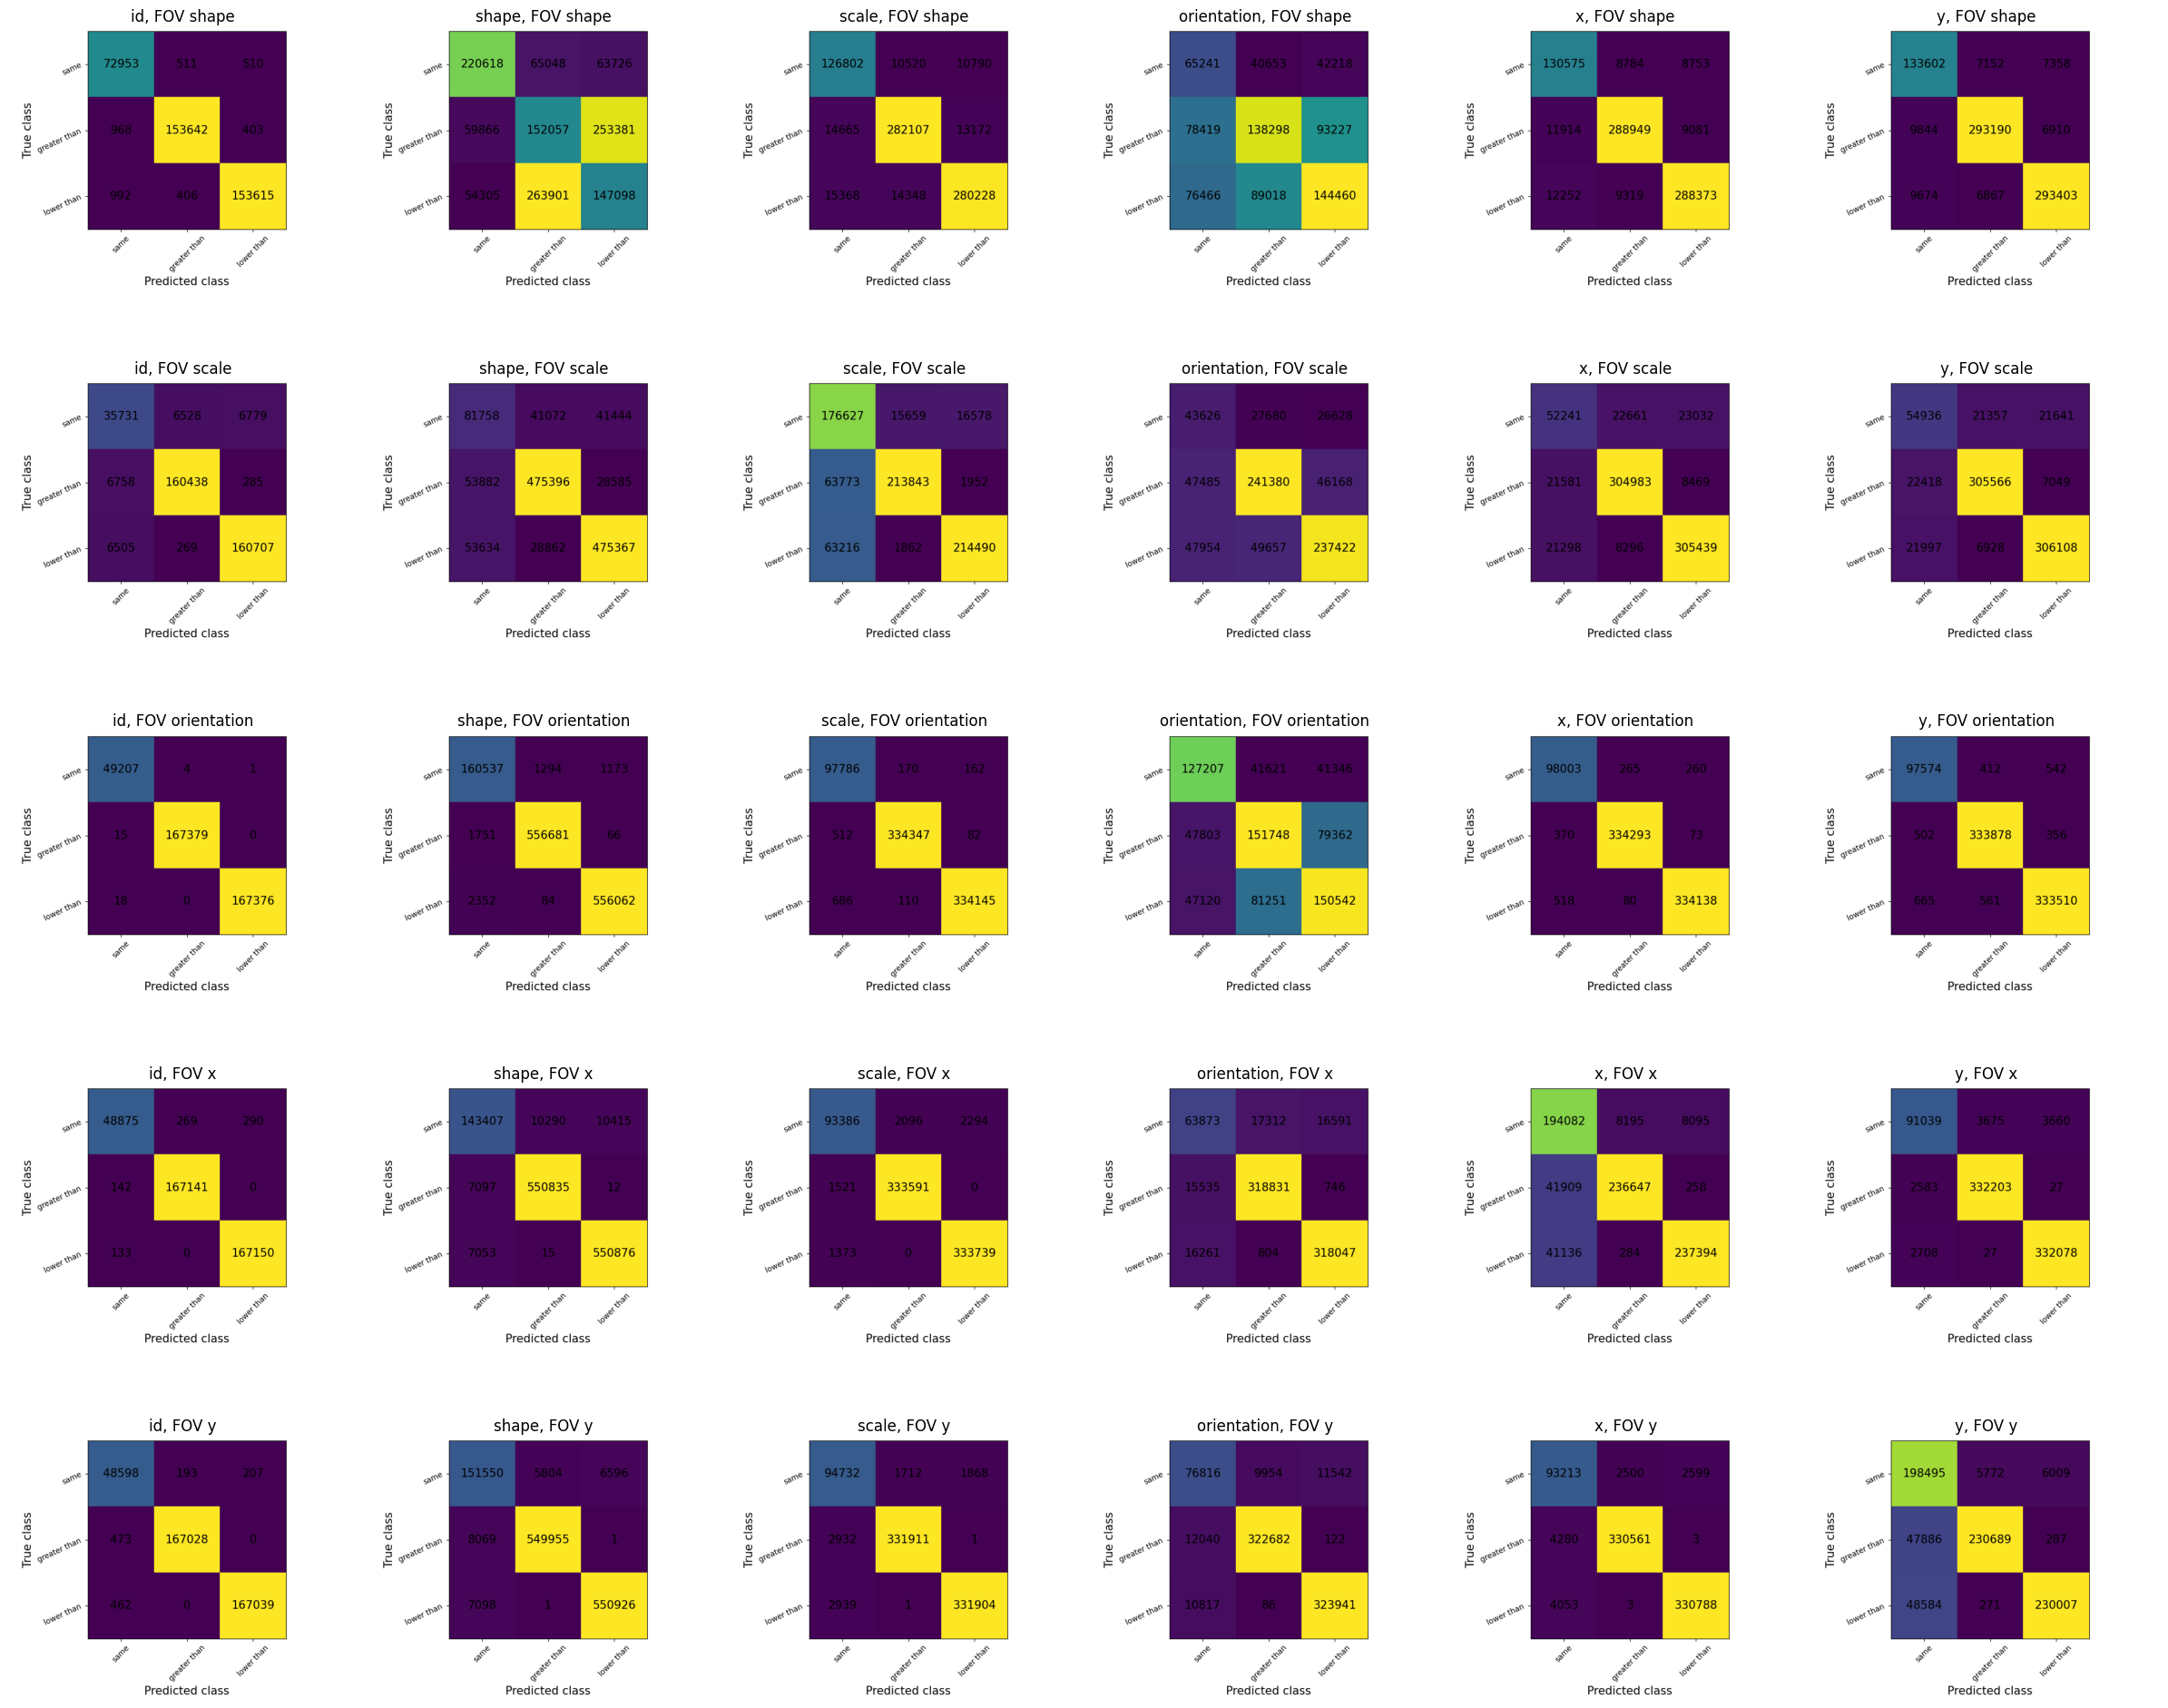

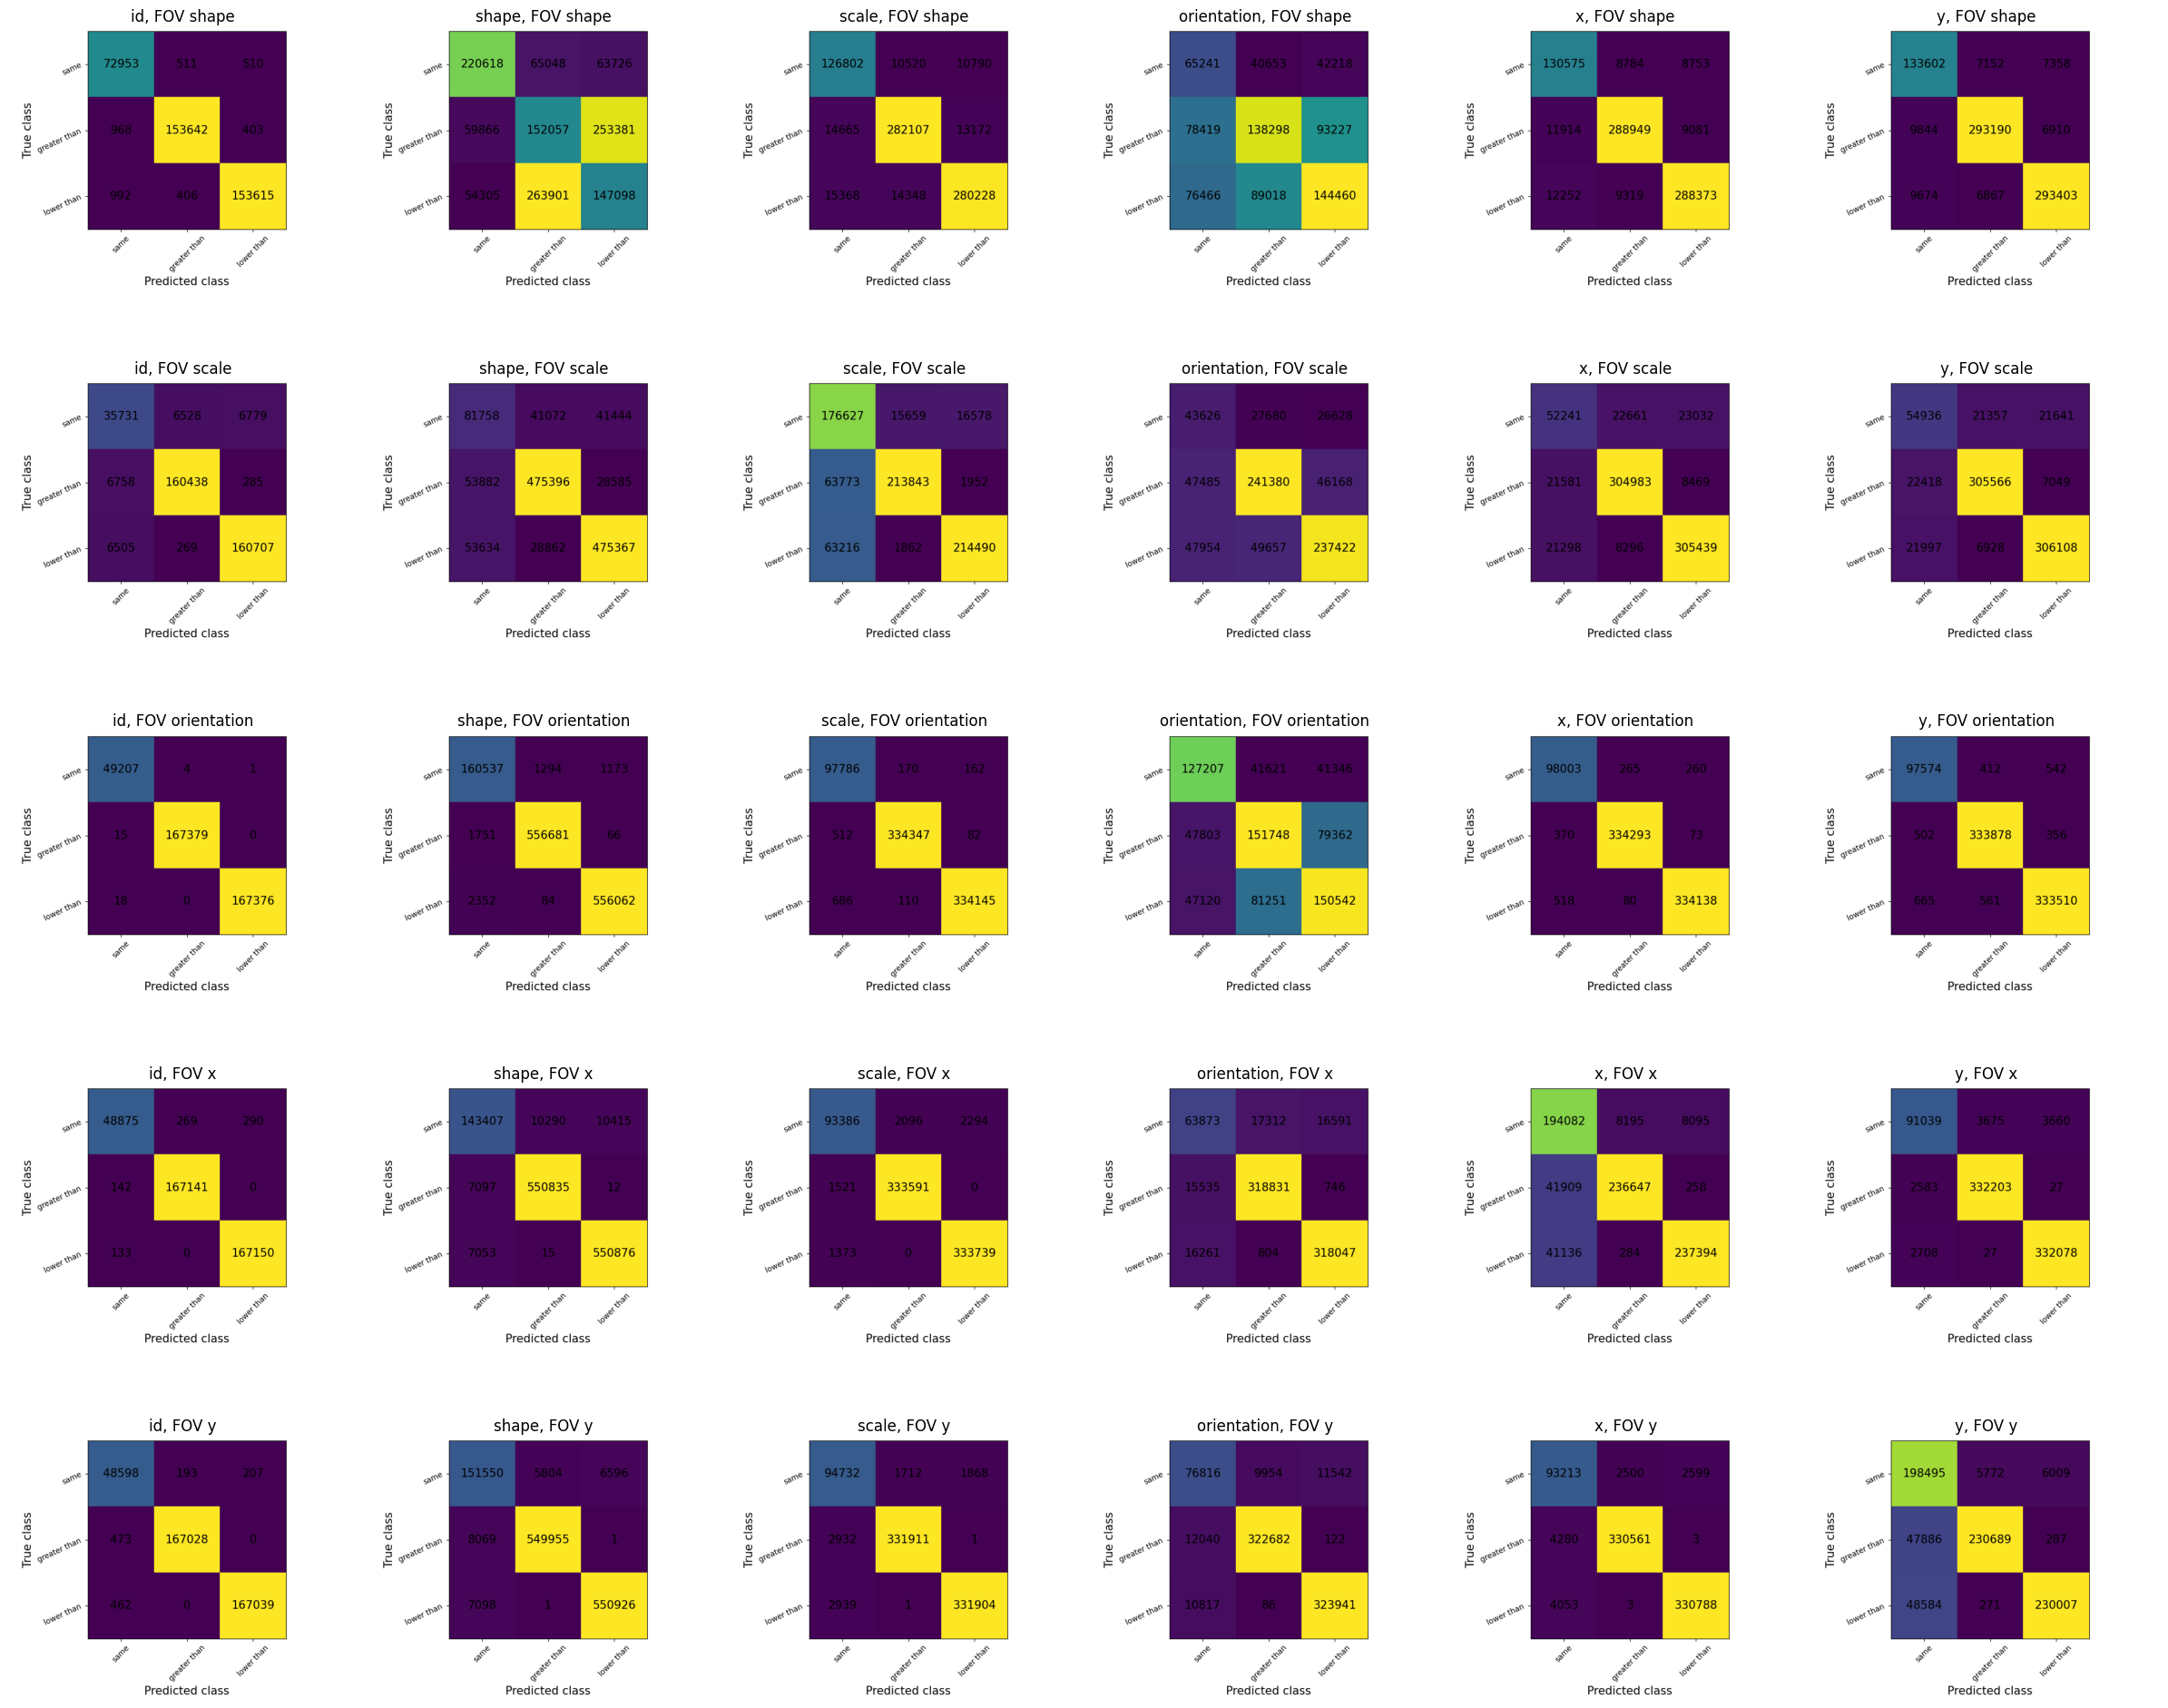

5 6


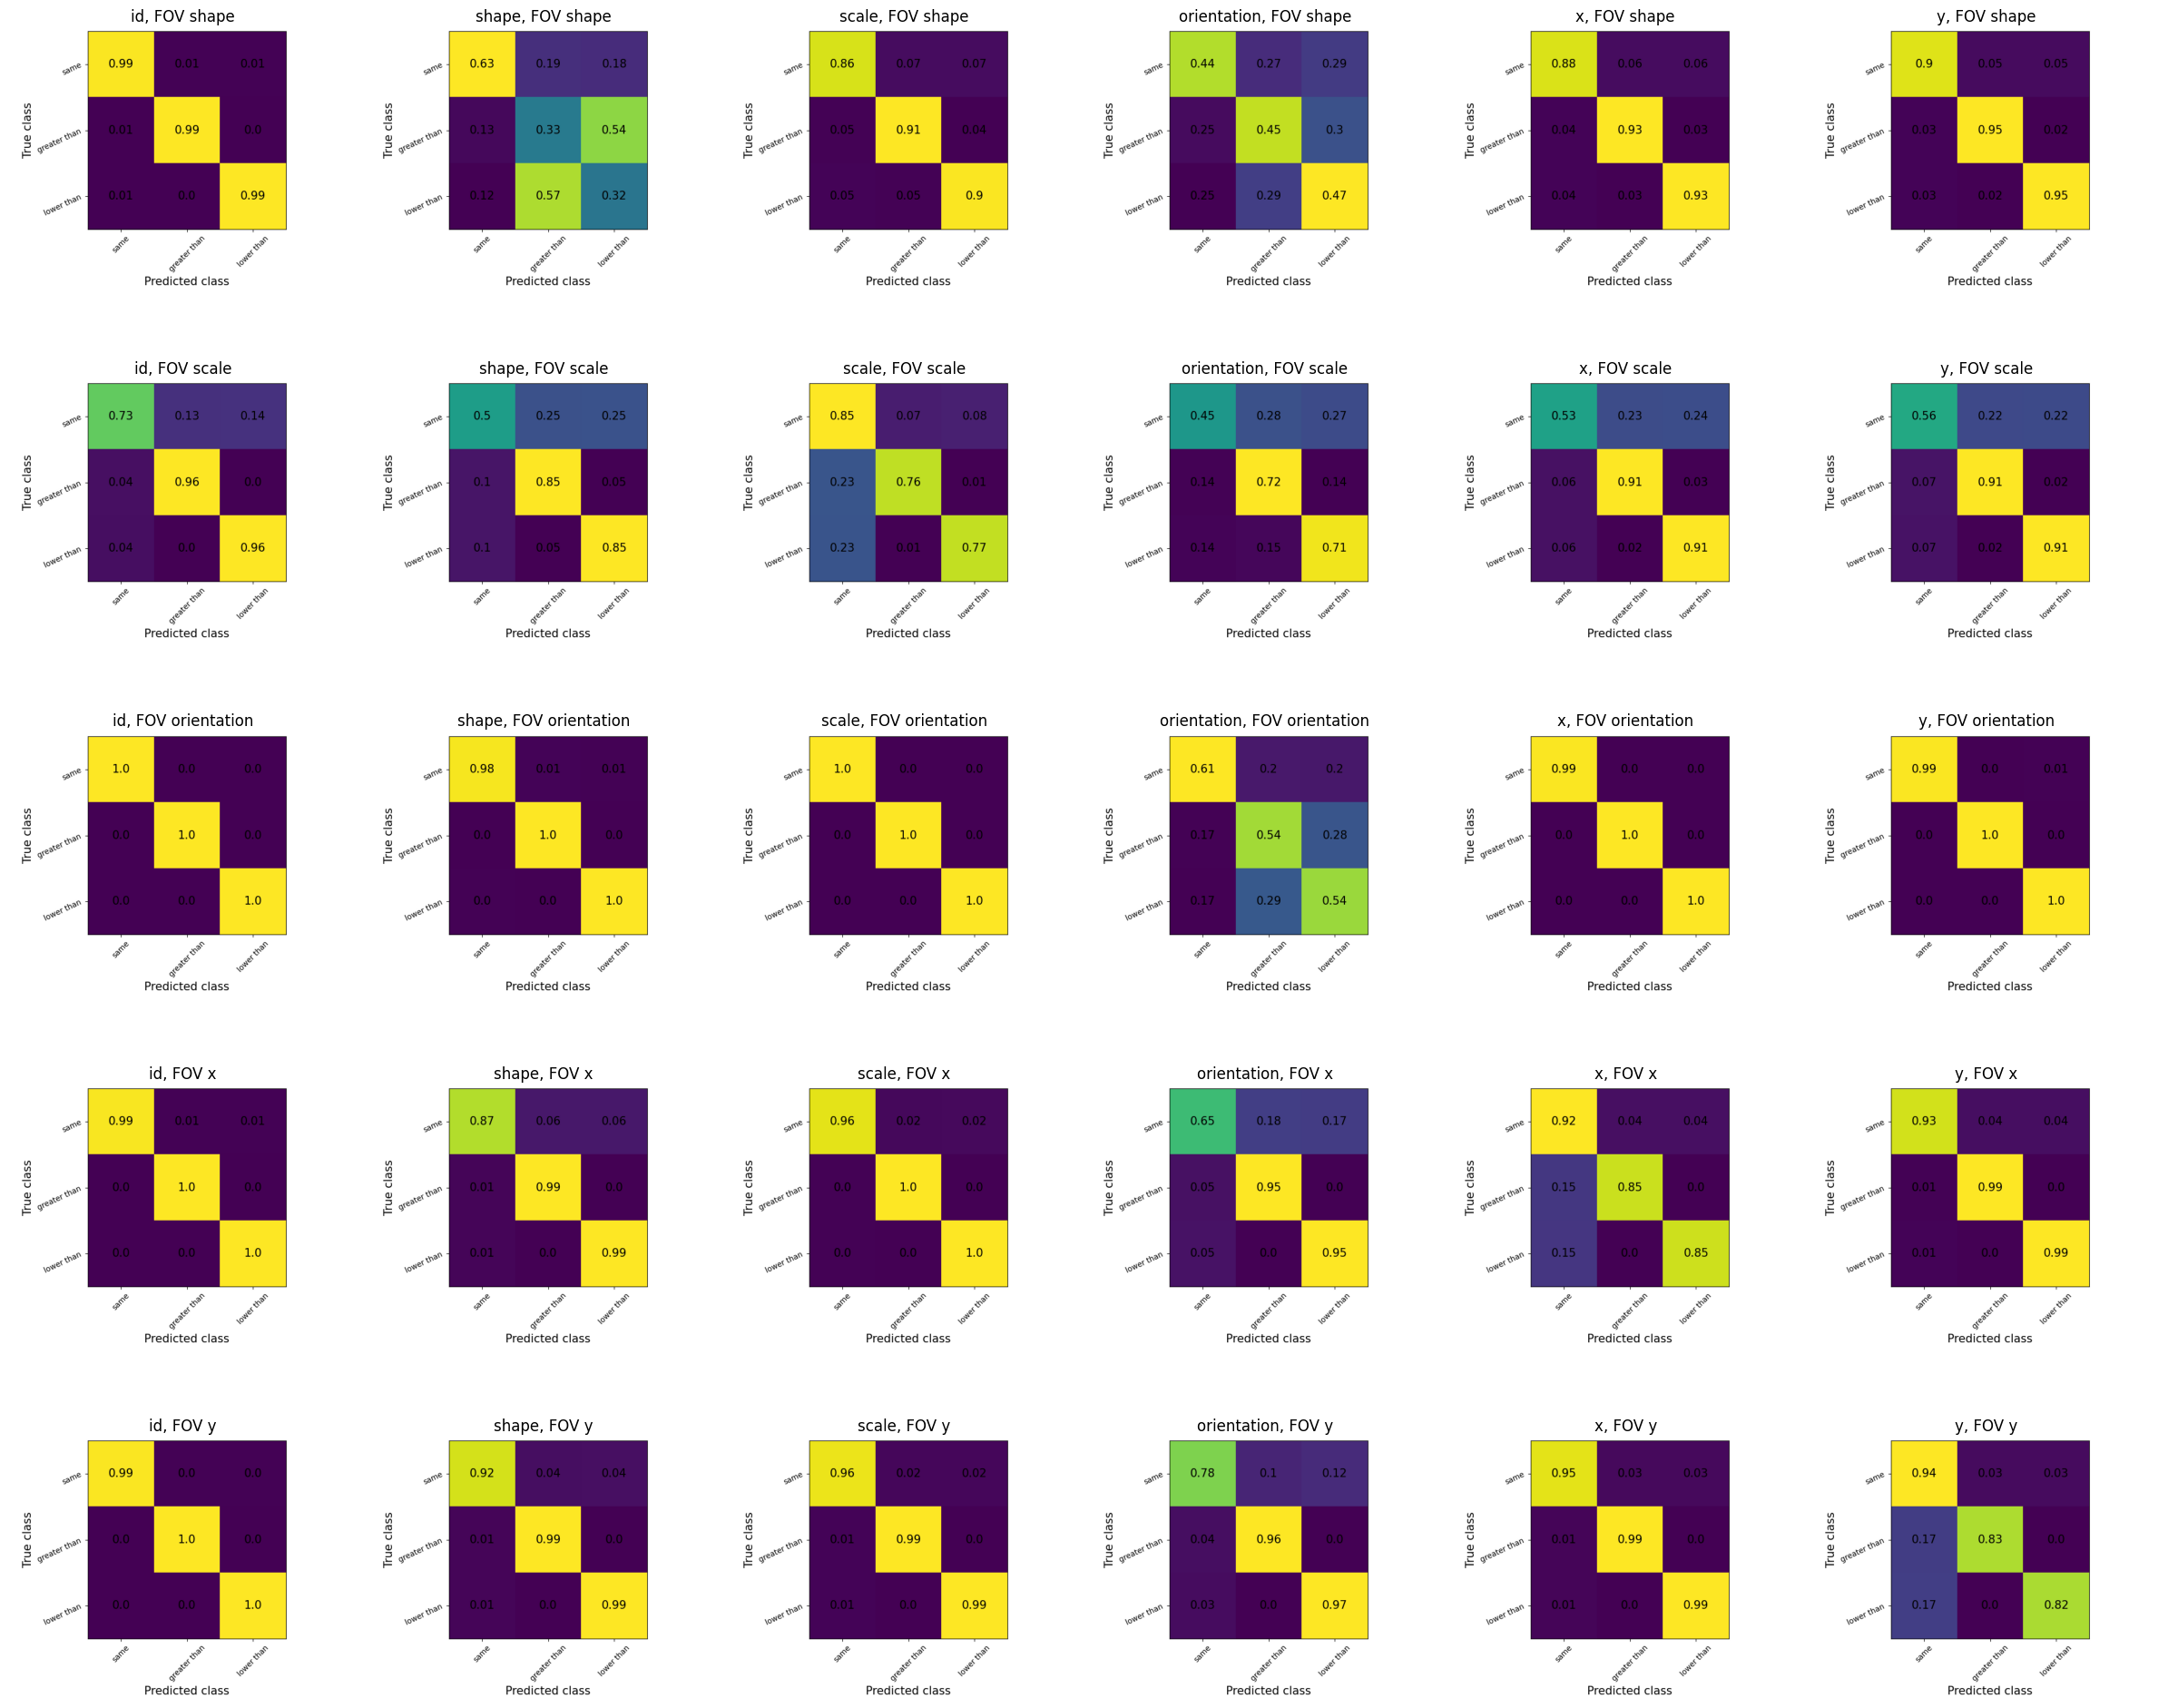

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def display_confusion_matrices_grid(cms, splits, fovs, img_key_suffix="_img", filename="image.png"):
    """
    Display stored confusion matrix images as a grid.
    
    Args:
        cms: Dictionary containing confusion matrices and their images.
        splits: List of splits (rows of the grid).
        fovs: List of fovs (columns of the grid).
        img_key_suffix: Suffix used in the keys for confusion matrix images in the dictionary.
    """
    num_rows = len(fovs)
    num_cols = len(splits)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(4 * num_cols, 4 * num_rows))
    axes = axes if isinstance(axes, np.ndarray) else np.array([axes])
    for i, fov in enumerate(fovs):
        for j, split in enumerate(splits):
            ax = axes[i, j]
            img_key = f"{split}_cm_{fov}{img_key_suffix}"
            if img_key in cms:
                # Convert the image tensor back to a PIL image for display
                img = cms[img_key]  # Assuming the image is stored as a tensor
                img = Image.fromarray(img.astype(np.uint8))
                ax.imshow(img)
                ax.axis("off")
                ax.set_title(f"{split}, FOV {fov}")
            else:
                print(img_key)
                ax.axis("off")
                ax.set_title("No Data")

    plt.tight_layout()
    fig.savefig(filename, dpi=300)
    plt.show()
# Example usage
splits = ["id", "shape", "scale", "orientation", "x", "y"]
fovs = ["shape", "scale", "orientation", "x", "y"] # Replace with your actual fovs
display_confusion_matrices_grid(a, splits, fovs)
display_confusion_matrices_grid(a, splits, fovs,img_key_suffix="_imgperc", filename="holi.png")


In [11]:
a['id_cm_shape_img'].shape

(480, 640, 3)